In [ ]:
import os
from os import listdir
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as ny
import scipy.ndimage as ndi
!pip install nilearn
from nilearn import plotting
from scipy import ndimage as ndi
from skimage import data
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.segmentation import clear_border


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def abdomen_ct():

    img = []
    folder_dir =r"/content/drive/MyDrive/ABDOMEN CT"
    for images in os.listdir(folder_dir):

    # check if the image ends with .gz
        if (images.endswith(".gz")):
            img.append(images)
    #To read the nifti file by nibabel

    visulised_img=nib.load(os.path.join(folder_dir,img[3]))
    print (visulised_img)

     # view file metadata
    print(visulised_img.header)
    #data is a familiar NumPy array
    visulised_img_data=visulised_img.get_fdata()

    visulishedshape=visulised_img_data.shape

    #visualize a slice
    fig, axs = plt.subplots(1,3)
    fig.suptitle('Abdomen CT: (Middle Slices)')
    axs[0].imshow(visulised_img_data[visulishedshape[0]//2,:,:], cmap='gray')
    axs[1].imshow(visulised_img_data[:,visulishedshape[1]//2,:], cmap='gray')
    axs[2].imshow(visulised_img_data[:,:,visulishedshape[2]//2], cmap='gray')
    fig.tight_layout()
    plt.show()

#Plot a series of slices
    fig_rows = 4
    fig_cols = 4
    n_subplots = fig_rows * fig_cols
    n_slice = visulised_img_data.shape[0]
    step_size = n_slice // n_subplots
    plot_range = n_subplots * step_size
    start_stop = int((n_slice - plot_range) / 2)

    fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

    for idx, img in enumerate(range(start_stop, plot_range, step_size)):
        axs.flat[idx].imshow(ndi.rotate(visulised_img_data[:, img ,:],90), cmap='gray')
        axs.flat[idx].axis('off')
    fig.suptitle('Abdomen_CT:(Series of Slices)')
    plt.tight_layout()
    plt.show()

    plotting.plot_img(visulised_img)
    plt.suptitle("Visulisation of Abdomen CT :by Nilearn")
    plt.show()


    plotting.plot_img(visulised_img, display_mode='mosaic', cmap='gray')
    plt.show()

 #statistical analysis
    print("statistical Analysis of visulised image:Abdomen_CT")
    print("Mean:",visulised_img_data.mean())
    print("Max:",visulised_img_data.max())
    print("Min:",visulised_img_data.min())
    print("standard deviation:",ny.std(visulised_img_data))
    print("standard deviation:",ny.var(visulised_img_data))




    visulised_img_data.shape
    fig, axs = plt.subplots(1,1)
    fig.suptitle('segmented image:Abdomen CT')
    plt.pcolormesh(visulised_img_data[90])
    plt.colorbar
    plt.show()

    #segmentation of image
    mask=visulised_img_data<-320
    plt.suptitle('segmented image:Abdomen CT')
    plt.pcolormesh(mask[50])
    plt.colorbar()
    plt.show()

    mask_labeled=ny.vectorize(label,signature='(n,m)->(n,m)')(mask)
    fig, axs = plt.subplots(1,1)
    fig.suptitle('segmented image:Abdomen CT')
    plt.pcolormesh(mask_labeled[50])
    plt.colorbar()
    plt.show()

#statistical analysis
    print("statistical Analysis of segmented image:Abdomen_CT")
    print("Mean:",visulised_img_data[90].mean())
    print("Max:",visulised_img_data[90].max())
    print("Min:",visulised_img_data[90].min())
    print("standard deviation:",ny.std(visulised_img_data[90]))
    print("standard deviation:",ny.var(visulised_img_data[90]))


    # Original 2D array
    visulised_img_data=visulised_img.get_fdata()
    original_array = visulised_img_data

# Flatten using flatten method
    flattened_array = original_array.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)


    visulised_img1_data=visulised_img.get_fdata()
    original_array2 = visulised_img1_data[90]

# Flatten using flatten method
    flattened_array2 = original_array2.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)




    plt.hist(flattened_array2, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



    plt.hist(flattened_array, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 31)
affine: 
[[   0.78515601    0.            0.         -401.21472168]
 [   0.            0.78515601    0.         -401.21472168]
 [   0.            0.            7.5           0.        ]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  31   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       0.785156 0.785156 7.5      0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.

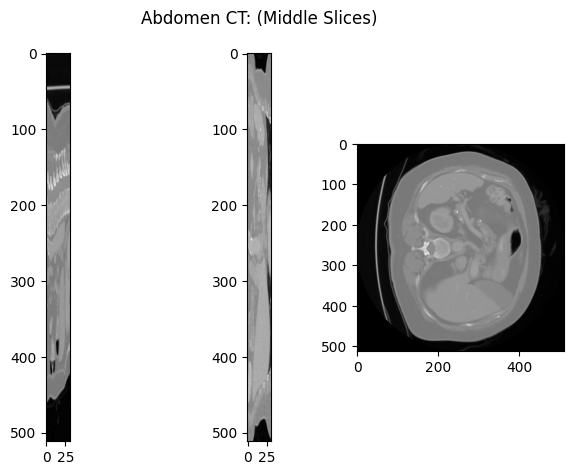

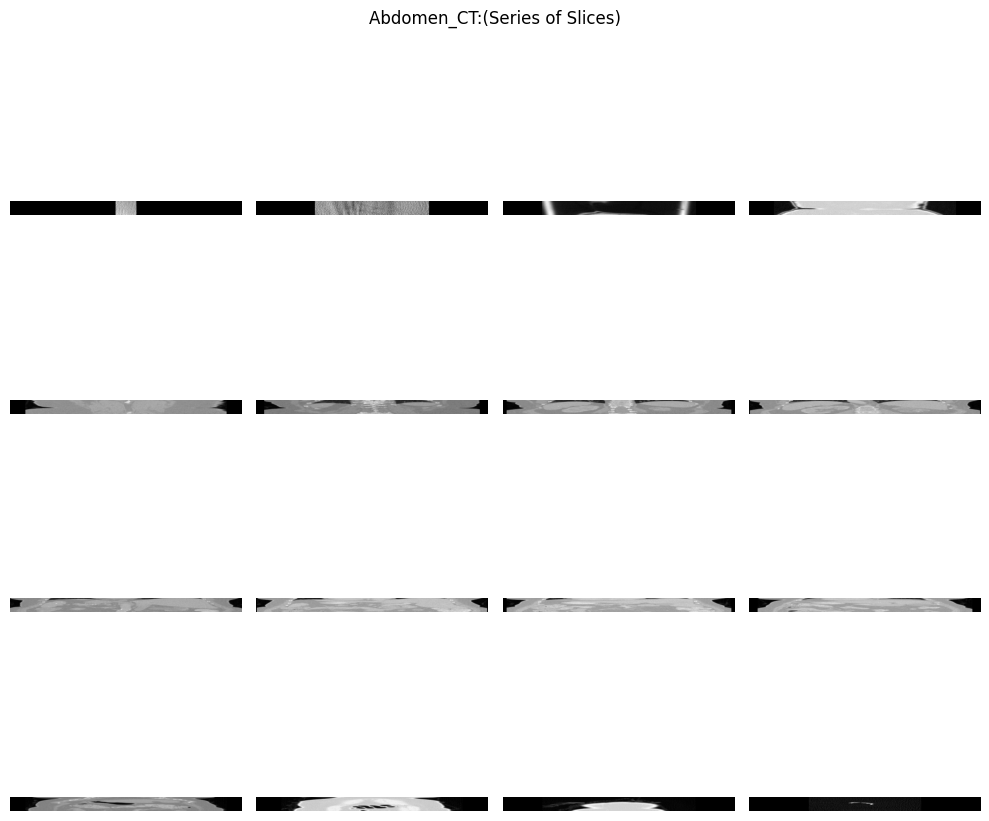

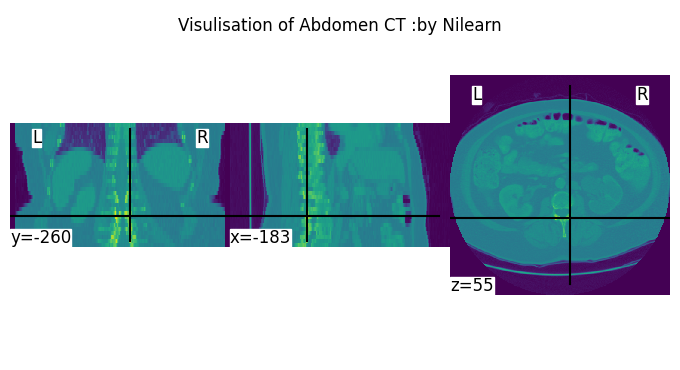

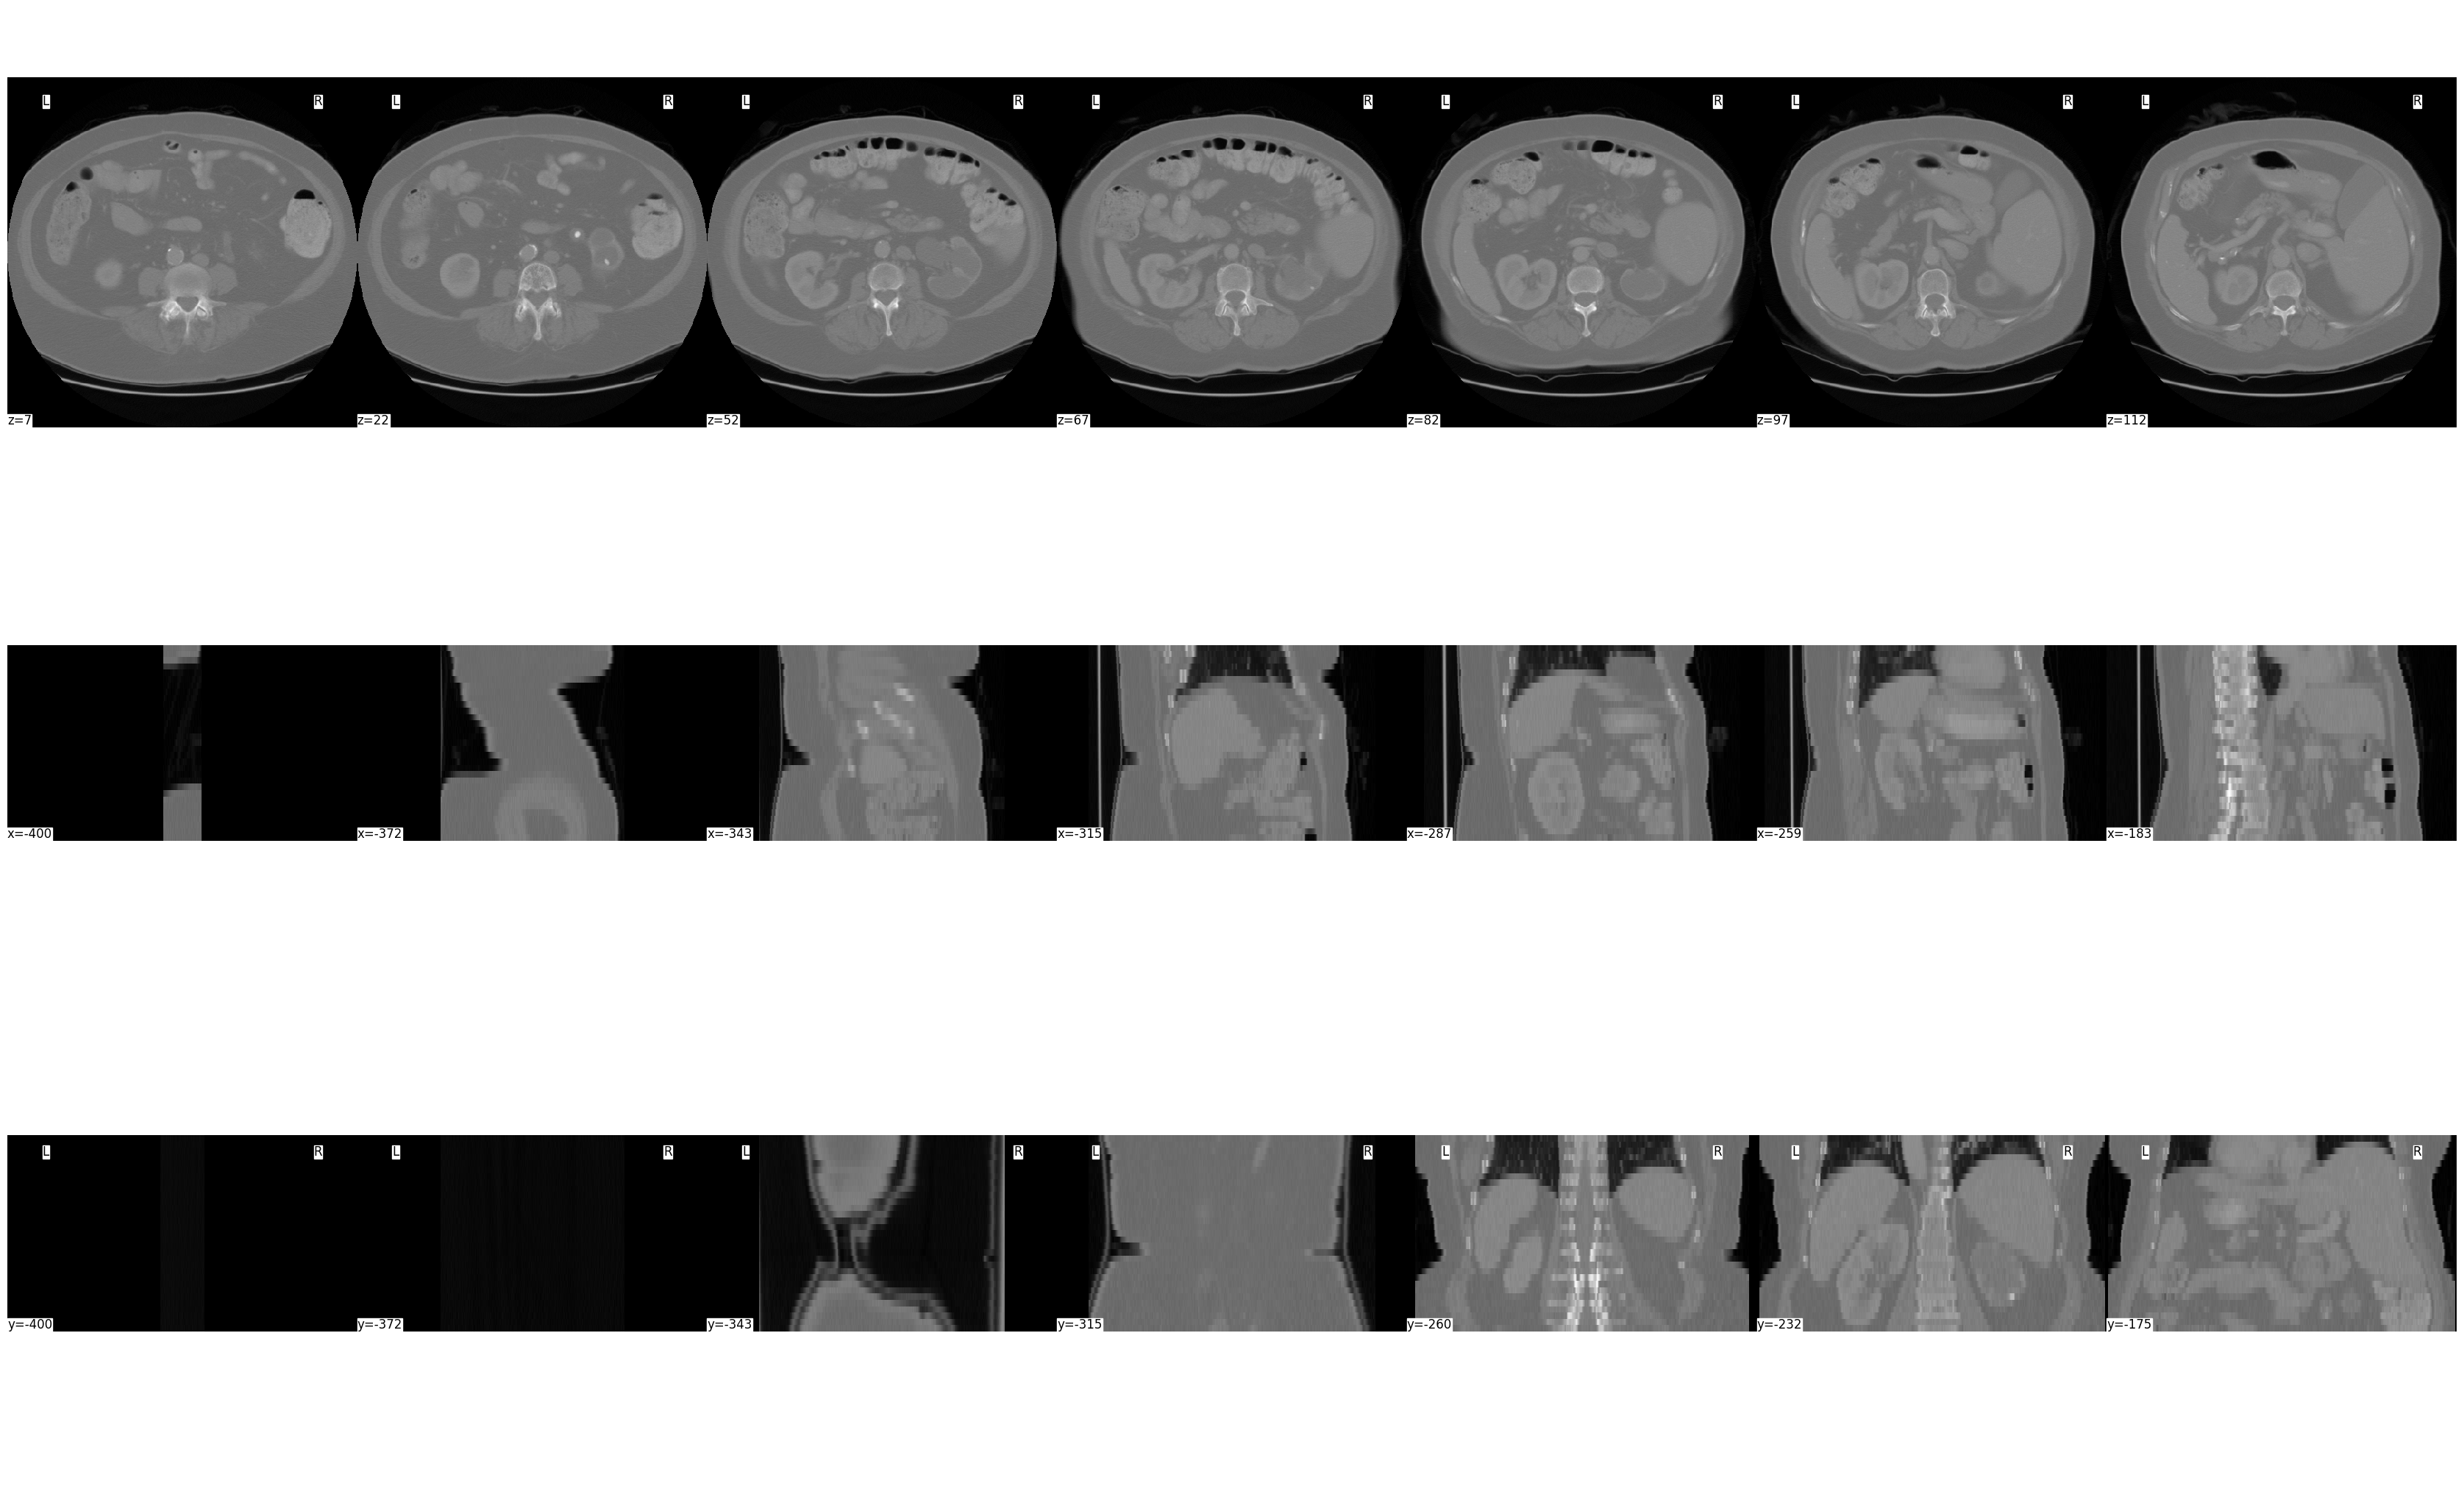

statistical Analysis of visulised image:Abdomen_CT
Mean: -428.51336694532824
Max: 1166.0
Min: -1024.0
standard deviation: 485.81054320686843
standard deviation: 236011.8838909526


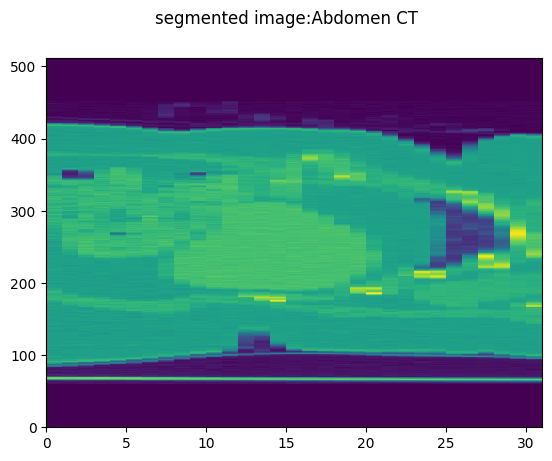

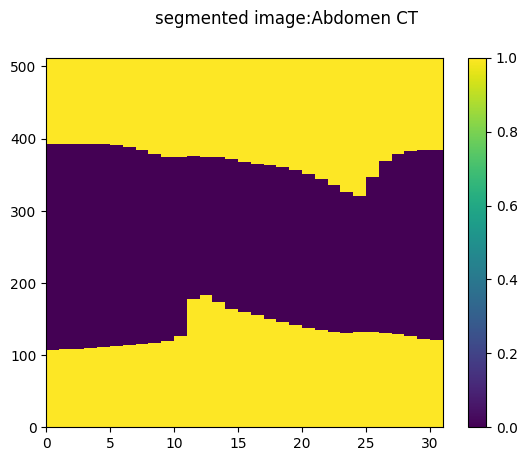

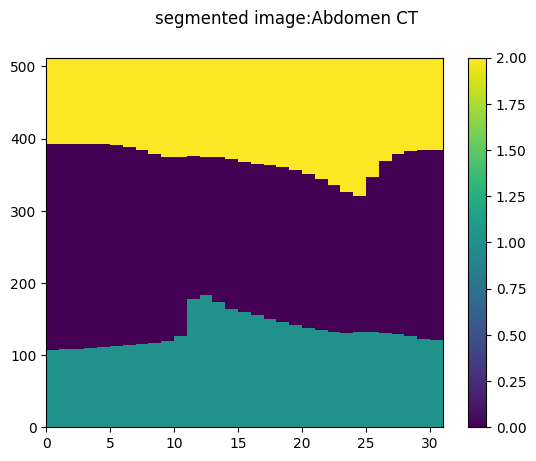

statistical Analysis of segmented image:Abdomen_CT
Mean: -406.57535282258067
Max: 608.0
Min: -1024.0
standard deviation: 479.5215767122868
standard deviation: 229940.94253263753
Original Array:
[[[-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  ...
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]]

 [[-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  ...
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]]

 [[-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  ...
  [-1024. -1024. -1024. ... -1024.

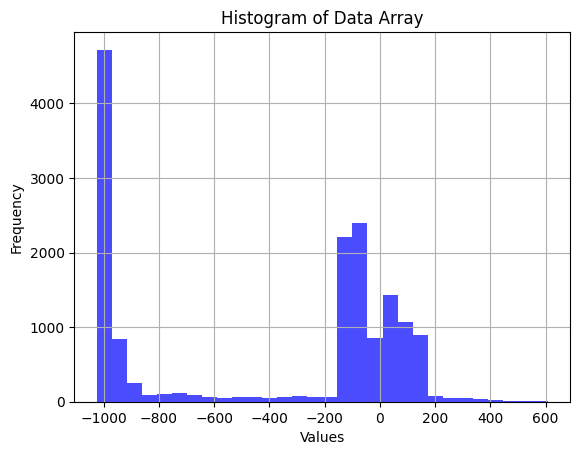

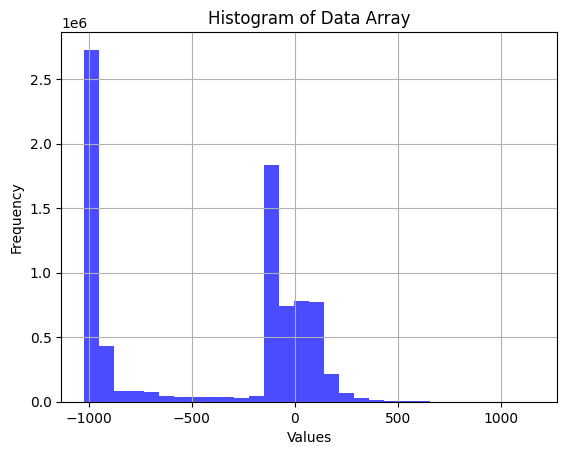

None


In [ ]:
print(abdomen_ct())

In [ ]:
def heart_mri():
    img = []

    folder_dir = r"/content/drive/MyDrive/HEART MRI"
    for images in os.listdir(folder_dir):

    # check if the image ends with png
        if (images.endswith(".gz")):
           img.append(images)
    #To read the nifti file by nibabel
    visulised_img=nib.load(os.path.join(folder_dir,img[3]))
    print (visulised_img)



    # view file metadata
    print(visulised_img.header)


    #data is a familiar NumPy array
    visulised_img_data=visulised_img.get_fdata()

    visulishedshape=visulised_img_data.shape

    #visualize a slice
    fig, axs = plt.subplots(1,3)
    fig.suptitle('Heart_MRI:(Middle Slices)')
    axs[0].imshow(visulised_img_data[visulishedshape[0]//2,:,:], cmap='gray')
    axs[1].imshow(visulised_img_data[:,visulishedshape[1]//2,:], cmap='gray')
    axs[2].imshow(visulised_img_data[:,:,visulishedshape[2]//2], cmap='gray')
    fig.tight_layout()
    plt.show()

    #Plot a series of slices
    fig_rows = 4
    fig_cols = 4
    n_subplots = fig_rows * fig_cols
    n_slice = visulised_img_data.shape[0]
    step_size = n_slice // n_subplots
    plot_range = n_subplots * step_size
    start_stop = int((n_slice - plot_range) / 2)

    fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

    for idx, img in enumerate(range(start_stop, plot_range, step_size)):
        axs.flat[idx].imshow(ndi.rotate(visulised_img_data[img, :, :], 90), cmap='gray')
        axs.flat[idx].axis('off')
    fig.suptitle('Heart_MRI:(Series of Slices)')
    plt.tight_layout()
    plt.show()


    plotting.plot_img(visulised_img)
    plt.suptitle("Visulisation of Heart_MRI :by Nilearn")
    plt.show()


    plotting.plot_img(visulised_img, display_mode='mosaic', cmap='gray')
    plt.show()


    #statistical anylysis
    print("statistical Analysis of visulised image:Heart_MRI")
    print("Mean:",visulised_img_data.mean())
    print("Max:",visulised_img_data.max())
    print("Min:",visulised_img_data.min())
    print("standard deviation:",ny.std(visulised_img_data))
    print("standard deviation:",ny.var(visulised_img_data))

    #Segmentation of image
    visulised_img_data.shape
    fig, axs = plt.subplots(1,1)
    fig.suptitle('segmented image:Heart_MRI')
    plt.pcolormesh(visulised_img_data[154])
    plt.colorbar
    plt.show()


    mask=visulised_img_data<320
    plt.suptitle('segmented image:Heart_MRI')
    plt.pcolormesh(mask[150])
    plt.colorbar()
    plt.show()

    mask_labeled=ny.vectorize(label,signature='(n,m)->(n,m)')(mask)
    fig, axs = plt.subplots(1,1)
    fig.suptitle('segmented image:Heart_MRI')
    plt.pcolormesh(mask_labeled[100])
    plt.colorbar()
    plt.show()

  #statistical anylysis
    print("statistical Analysis of segmented image:Heart_MRI")
    print("Mean:",visulised_img_data[154].mean())
    print("Max:",visulised_img_data[154].max())
    print("Min:",visulised_img_data[154].min())
    print("standard deviation:",ny.std(visulised_img_data[154]))
    print("standard deviation:",ny.var(visulised_img_data[154]))

     # Original 2D array
    visulised_img_data=visulised_img.get_fdata()
    original_array = visulised_img_data

# Flatten using flatten method
    flattened_array = original_array.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)


    visulised_img1_data=visulised_img.get_fdata()
    original_array2 = visulised_img1_data[154]

# Flatten using flatten method
    flattened_array2 = original_array2.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)

    plt.hist(flattened_array2, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



    plt.hist(flattened_array, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()




<class 'nibabel.nifti1.Nifti1Image'>
data shape (320, 320, 110)
affine: 
[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320 110   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      

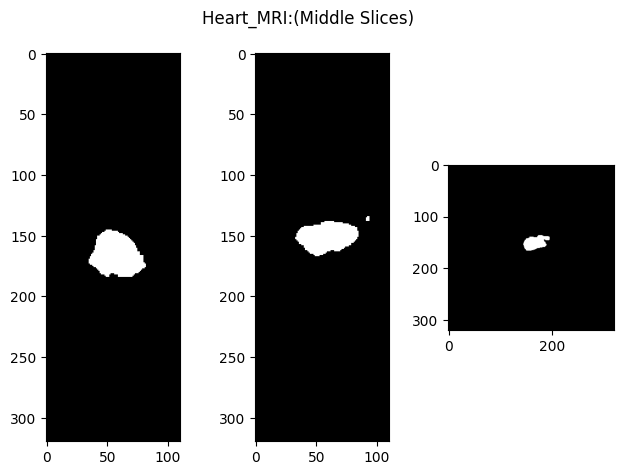

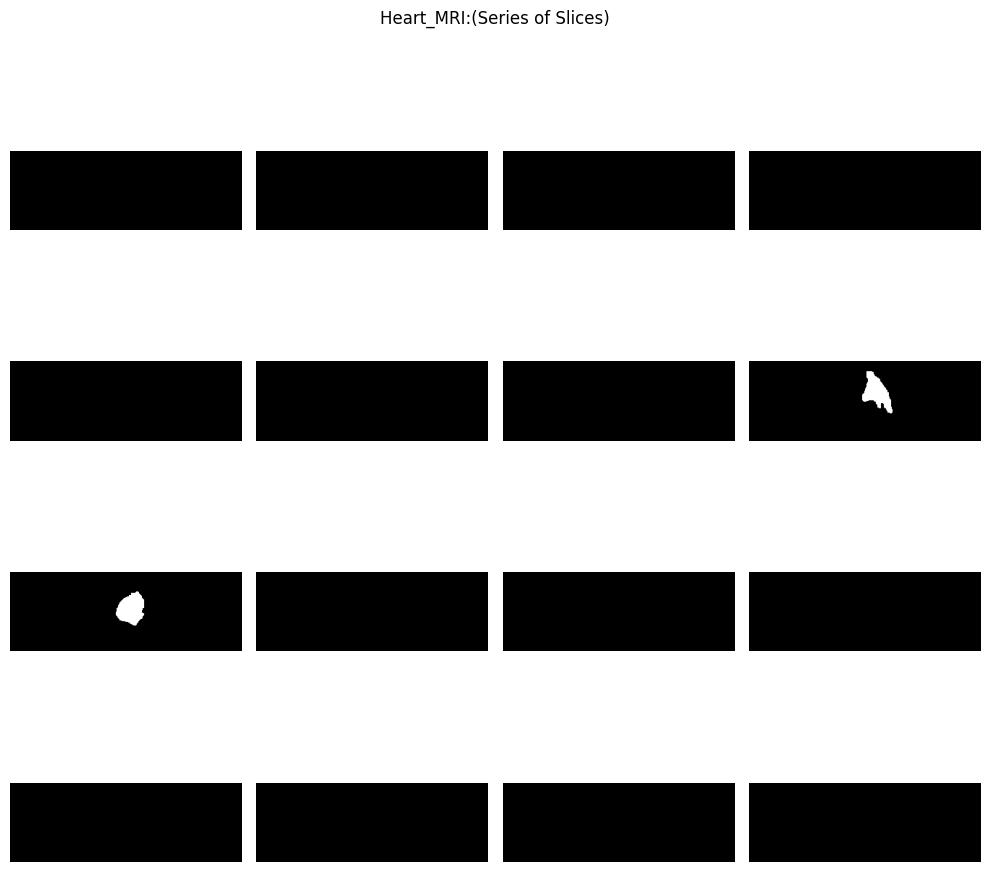

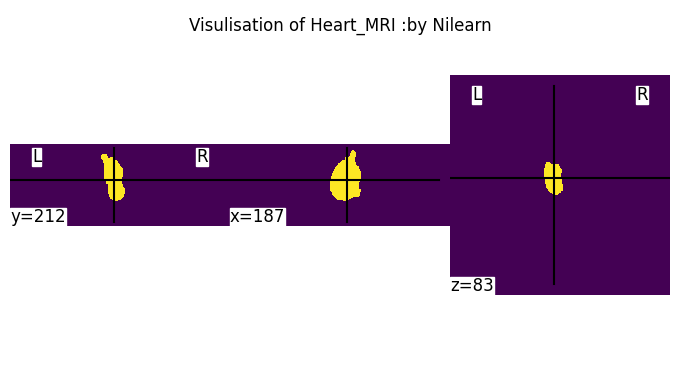

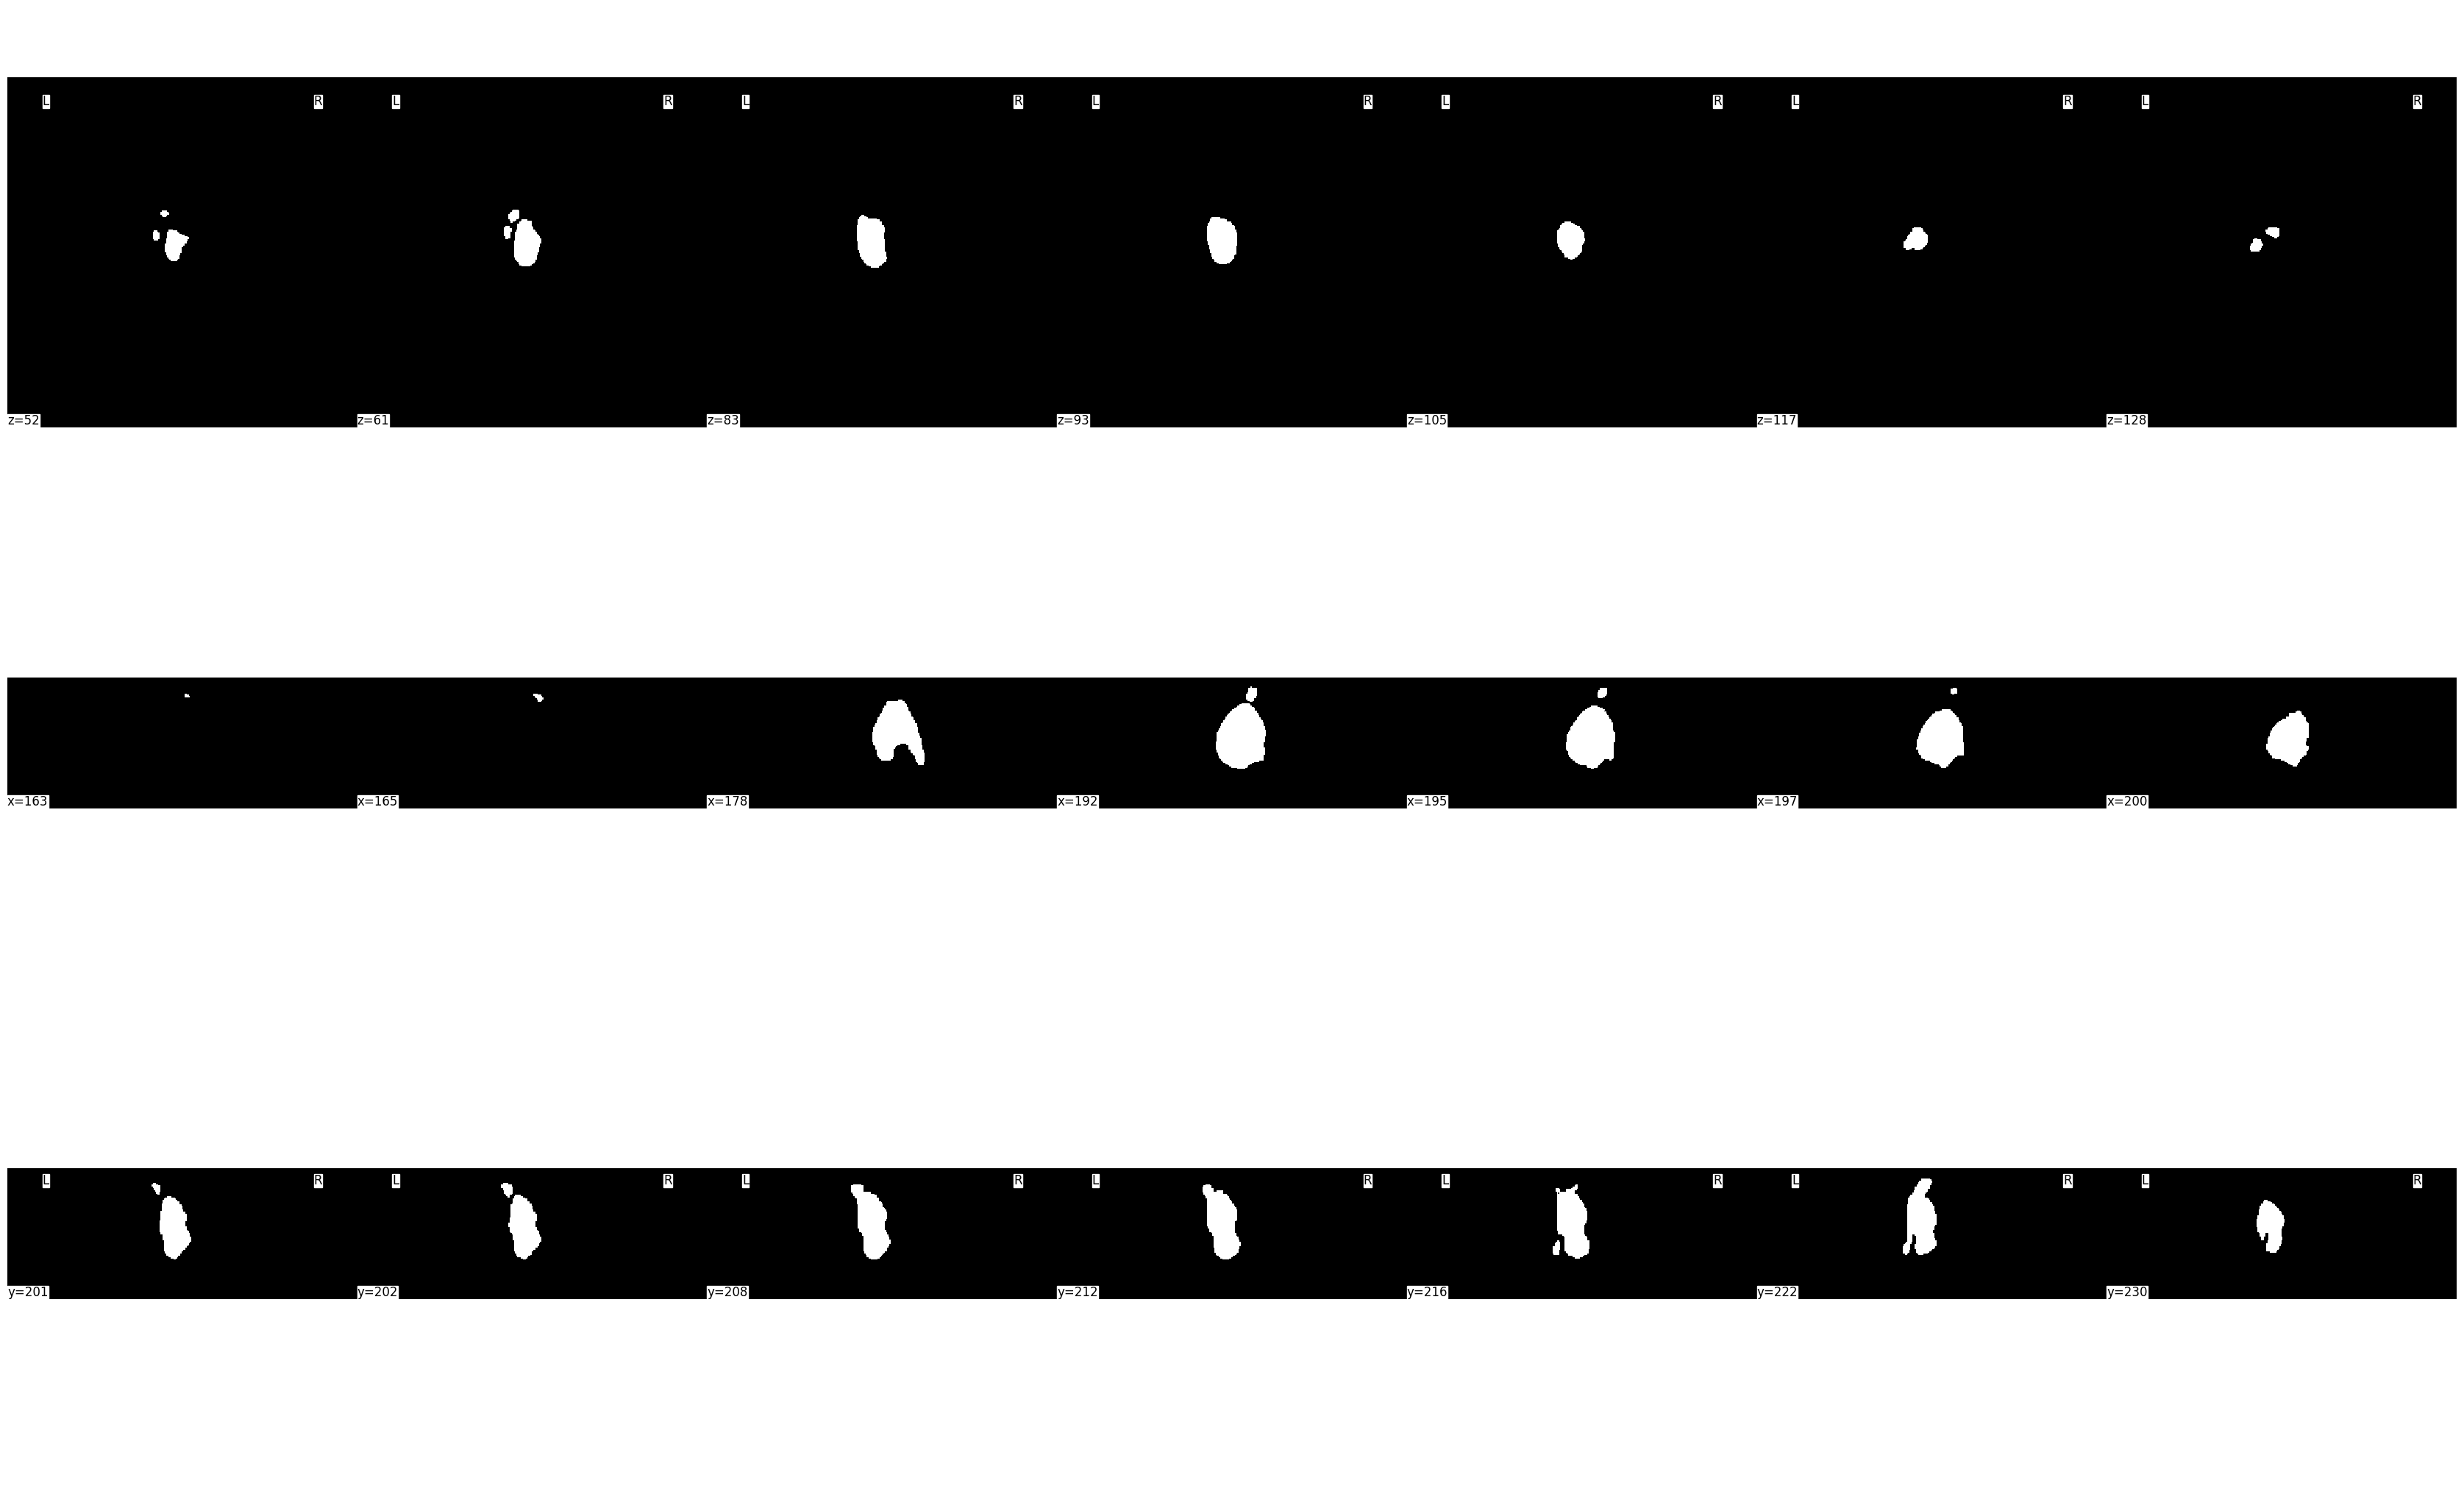

statistical Analysis of visulised image:Heart_MRI
Mean: 0.003993430397727273
Max: 1.0
Min: 0.0
standard deviation: 0.06306728875879901
standard deviation: 0.003977482911385736


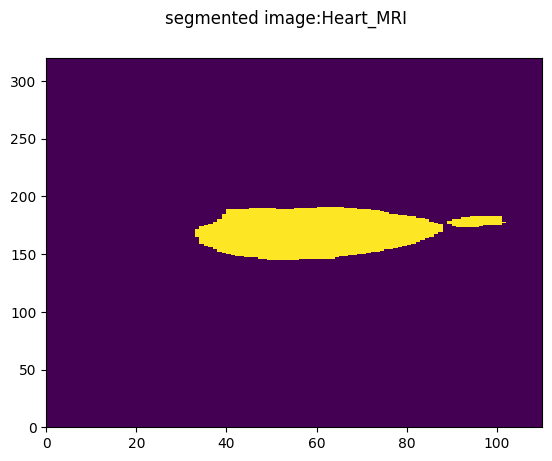

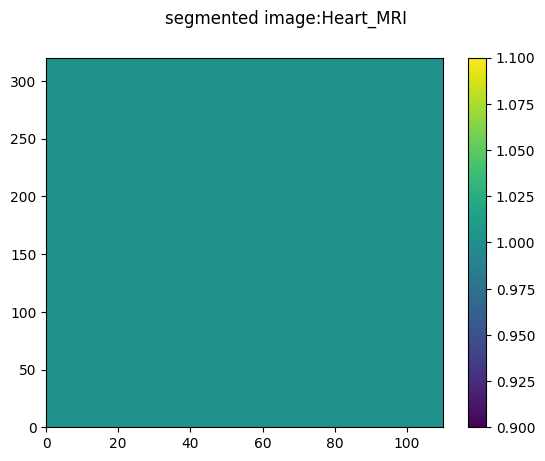

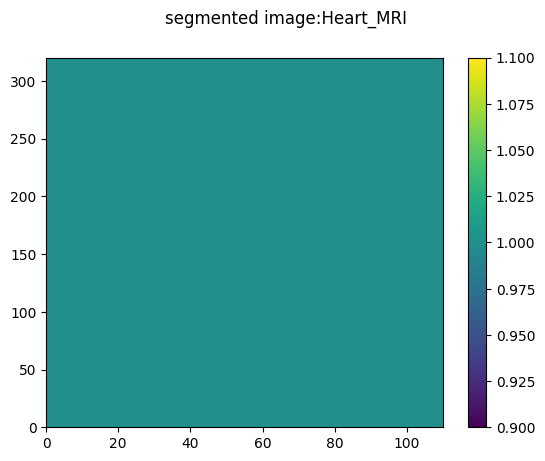

statistical Analysis of segmented image:Heart_MRI
Mean: 0.056875
Max: 1.0
Min: 0.0
standard deviation: 0.23160361477101346
standard deviation: 0.053640234375
Original Array:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]



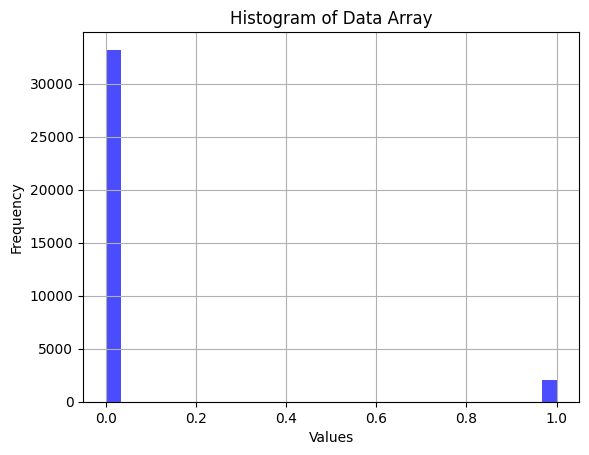

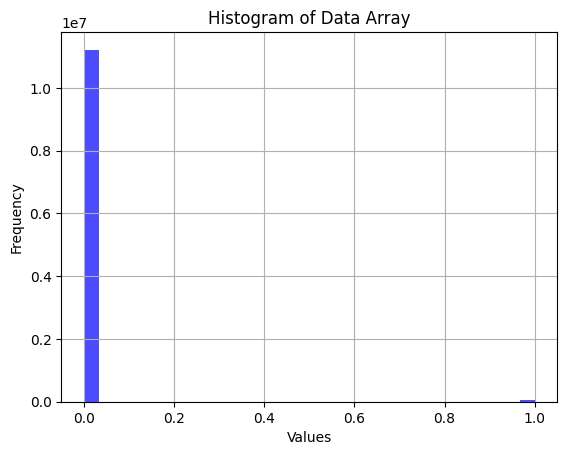

None


In [ ]:
print (heart_mri())

In [ ]:
def hippocampus_mri():
    img = []
    folder_dir = r"/content/drive/MyDrive/HIPPOCAMPUS MRI"
    for images in os.listdir(folder_dir):

    # check if the image ends with png
        if (images.endswith(".gz")):
           img.append(images)
    visulised_img=nib.load(os.path.join(folder_dir,img[0]))
    print (visulised_img)



    # view file metadata
    print(visulised_img.header)


    #data is a familiar NumPy array
    visulised_img_data=visulised_img.get_fdata()

    visulishedshape=visulised_img_data.shape

    #visualize a slice
    fig, axs = plt.subplots(1,3)
    fig.suptitle('Hippocampus_MRI:(Middle Slices)')
    axs[0].imshow(visulised_img_data[visulishedshape[0]//2,:,:], cmap='gray')
    axs[1].imshow(visulised_img_data[:,visulishedshape[1]//2,:], cmap='gray')
    axs[2].imshow(visulised_img_data[:,:,visulishedshape[2]//2], cmap='gray')
    fig.tight_layout()
    plt.show()

    #Plot a series of slices
    fig_rows = 4
    fig_cols = 4
    n_subplots = fig_rows * fig_cols
    n_slice = visulised_img_data.shape[0]
    step_size = n_slice // n_subplots
    plot_range = n_subplots * step_size
    start_stop = int((n_slice - plot_range) / 2)

    fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

    for idx, img in enumerate(range(start_stop, plot_range, step_size)):
        axs.flat[idx].imshow(ndi.rotate(visulised_img_data[img, :, :], 90), cmap='gray')
        axs.flat[idx].axis('off')
    fig.suptitle('Hippocampus_MRI:(Series of Slices)')
    plt.tight_layout()
    plt.show()

    plotting.plot_img(visulised_img)
    plt.suptitle("Visulisation of Hippocapus_MRI :by Nilearn")
    plt.show()


    plotting.plot_img(visulised_img, display_mode='mosaic', cmap='gray')
    plt.show()
     #statistical anylysis
    print("statistical Analysis of visulised image:Hippocampus MRI")
    print("Mean:",visulised_img_data.mean())
    print("Max:",visulised_img_data.max())
    print("Min:",visulised_img_data.min())
    print("standard deviation:",ny.std(visulised_img_data))
    print("standard deviation:",ny.var(visulised_img_data))


    #Segmentation of image
    visulised_img_data.shape
    fig, axs = plt.subplots(1,1)
    fig.suptitle('segmented image:Hippocampus_MRI')
    plt.pcolormesh(visulised_img_data[20])
    plt.colorbar
    plt.show()

    mask=visulised_img_data<300
    plt.suptitle('segmented image:Hippocampus_MRI')
    plt.pcolormesh(mask[20])
    plt.colorbar()
    plt.show()

    mask_labeled=ny.vectorize(label,signature='(n,m)->(n,m)')(mask)
    fig, axs = plt.subplots(1,1)
    fig.suptitle('segmented image:Hippocampus_MRI')
    plt.pcolormesh(mask_labeled[30])
    plt.colorbar()
    plt.show()

 #statistical anylysis
    print("statistical Analysis of segmented image:Hippocampus MRI")
    print("Mean:",visulised_img_data[20].mean())
    print("Max:",visulised_img_data[20].max())
    print("Min:",visulised_img_data[20].min())
    print("standard deviation:",ny.std(visulised_img_data[20]))
    print("standard deviation:",ny.var(visulised_img_data[20]))

     # Original 2D array
    visulised_img_data=visulised_img.get_fdata()
    original_array = visulised_img_data

# Flatten using flatten method
    flattened_array = original_array.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)


    visulised_img1_data=visulised_img.get_fdata()
    original_array2 = visulised_img1_data[20]

# Flatten using flatten method
    flattened_array2 = original_array2.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)

    plt.hist(flattened_array2, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



    plt.hist(flattened_array, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()





<class 'nibabel.nifti1.Nifti1Image'>
data shape (35, 55, 37)
affine: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 55 37  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
q

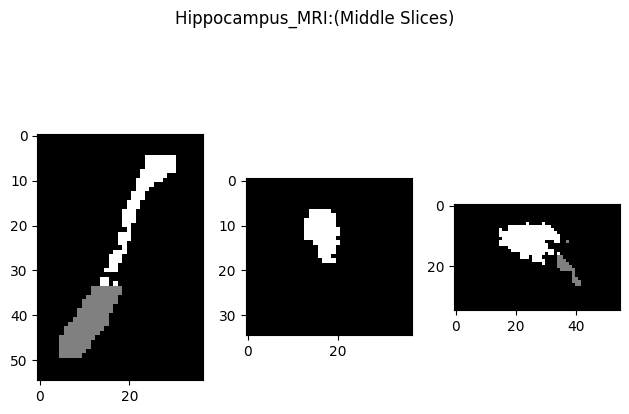

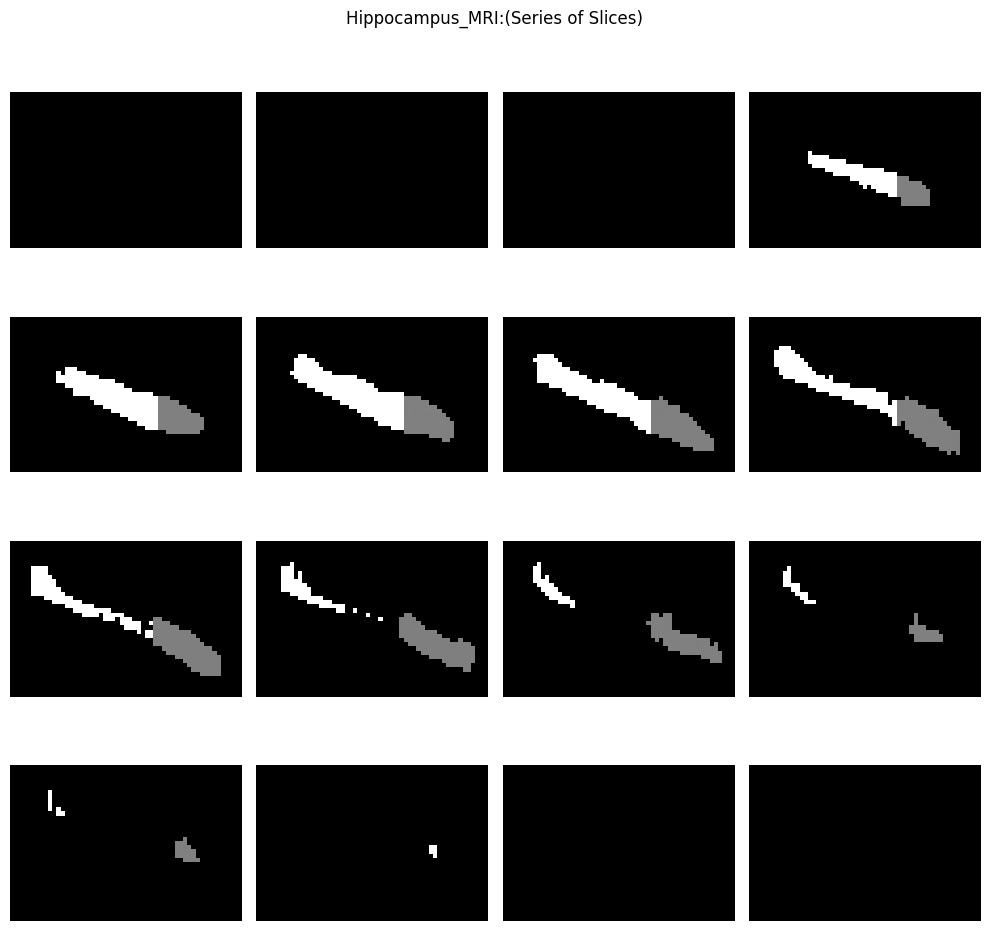

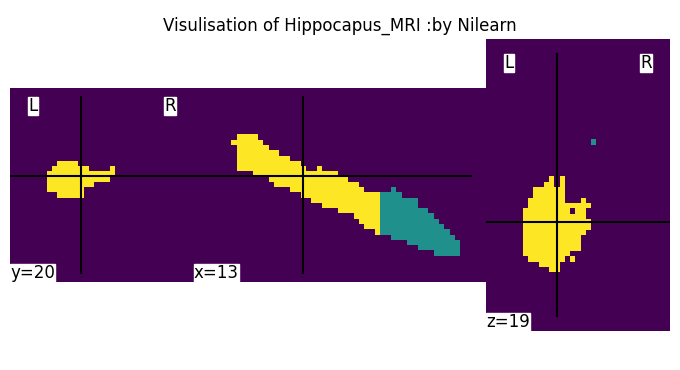

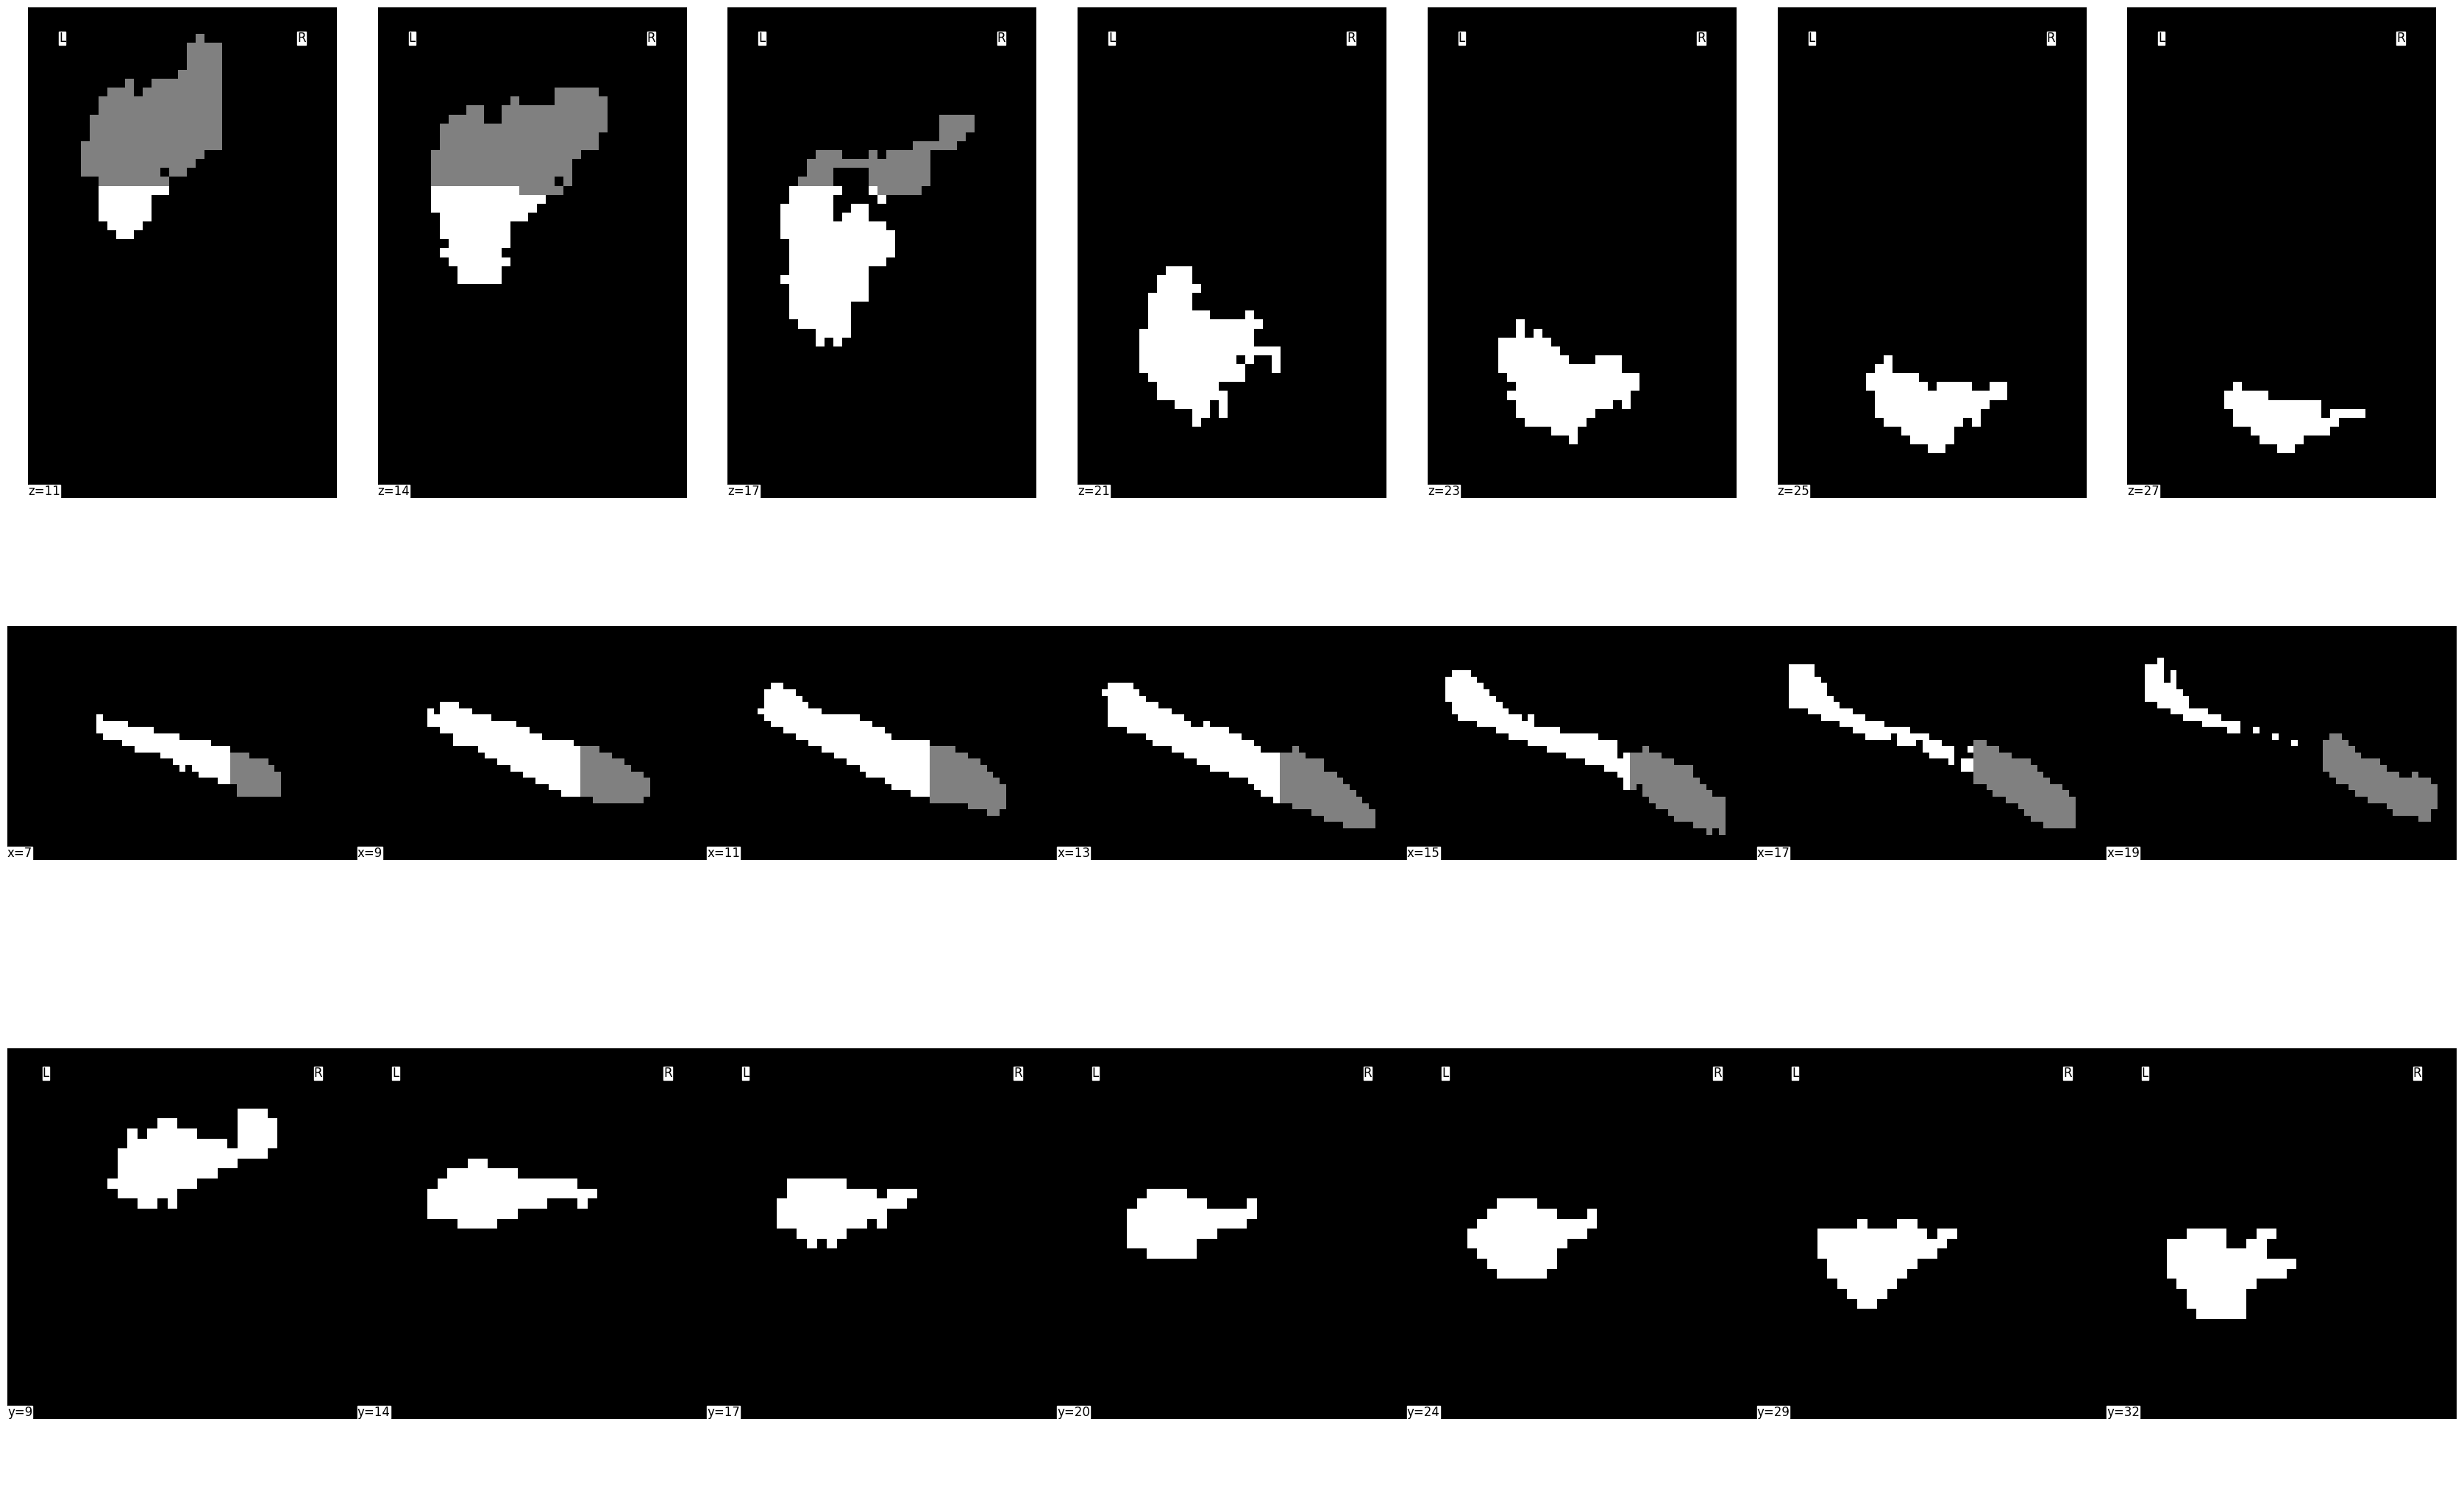

statistical Analysis of visulised image:Hippocampus MRI
Mean: 0.07773955773955774
Max: 2.0
Min: 0.0
standard deviation: 0.3558379600696792
standard deviation: 0.12662065382655063


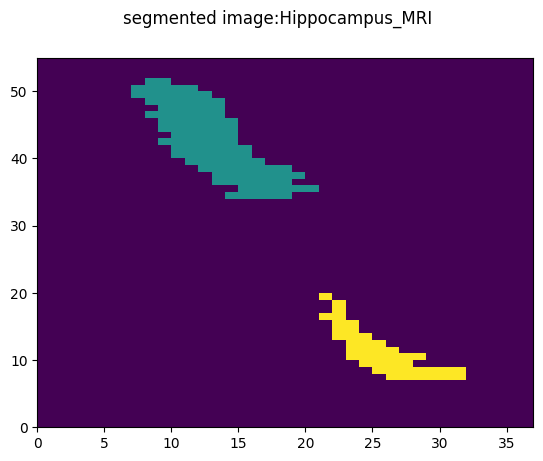

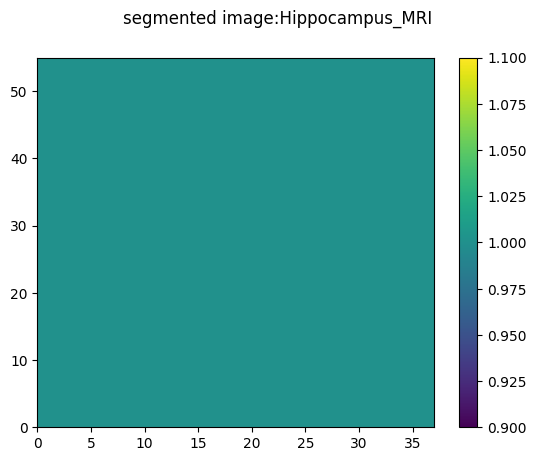

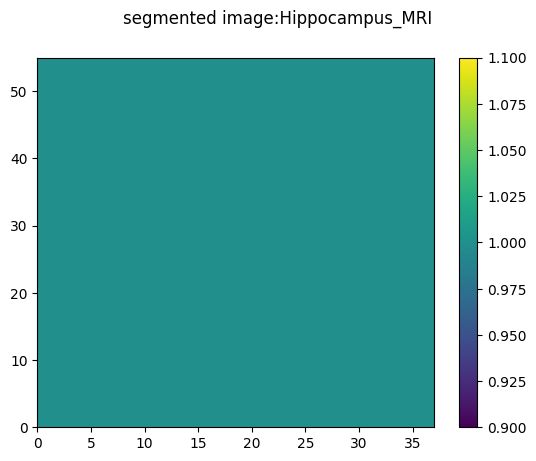

statistical Analysis of segmented image:Hippocampus MRI
Mean: 0.0914004914004914
Max: 2.0
Min: 0.0
standard deviation: 0.35259620368047273
standard deviation: 0.1243240828498814
Original Array:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0.

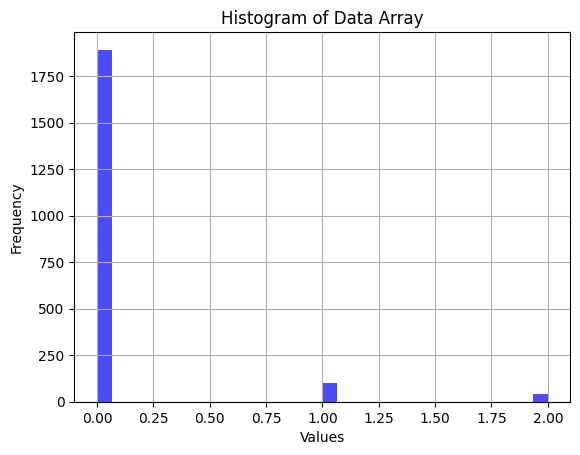

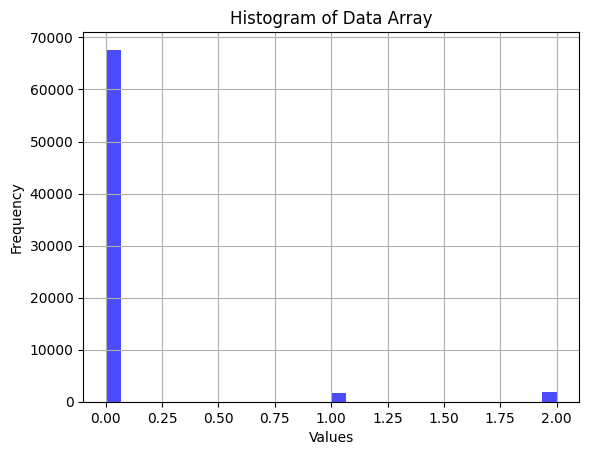

None


In [ ]:
print(hippocampus_mri())

In [ ]:
def prostate_mri157():
    img = []
    folder_dir = r"/content/drive/MyDrive/PROSTRATE MRI/New folder1"
    for images in os.listdir(folder_dir):

    # check if the image ends with png
        if (images.endswith(".gz")):
           img.append(images)
    visulised_img=nib.load(os.path.join(folder_dir,img[0]))
    print (visulised_img)



    # view file metadata
    print(visulised_img.header)


    #data is a familiar NumPy array
    visulised_img_data=visulised_img.get_fdata()

    visulishedshape=visulised_img_data.shape

    #visualize a slice
    fig, axs = plt.subplots(1,3)
    fig.suptitle('Prostate_MRI:(Middle Slices)')
    axs[0].imshow(visulised_img_data[visulishedshape[0]//2,:,:], cmap='gray')
    axs[1].imshow(visulised_img_data[:,visulishedshape[1]//2,:], cmap='gray')
    axs[2].imshow(visulised_img_data[:,:,visulishedshape[2]//2], cmap='gray')
    fig.tight_layout()
    plt.show()


    #Plot a series of slices
    fig_rows = 4
    fig_cols = 4
    n_subplots = fig_rows * fig_cols
    n_slice = visulised_img_data.shape[0]
    step_size = n_slice // n_subplots
    plot_range = n_subplots * step_size
    start_stop = int((n_slice - plot_range) / 2)

    fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

    for idx, img in enumerate(range(start_stop, plot_range, step_size)):
        axs.flat[idx].imshow(ndi.rotate(visulised_img_data[img, :, :], 90), cmap='gray')
        axs.flat[idx].axis('off')
    fig.suptitle('Prostate_MRI:(Series of Slices)')
    plt.tight_layout()
    plt.show()

    plotting.plot_img(visulised_img)
    plt.suptitle("Visulisation of Prostate_MRI :by Nilearn")
    plt.show()


    plotting.plot_img(visulised_img, display_mode='mosaic', cmap='gray')
    plt.show()



    #statistical anylysis
    print("statistical Analysis of visulised image:Prostate MRI")
    print("Mean:",visulised_img_data.mean())
    print("Max:",visulised_img_data.max())
    print("Min:",visulised_img_data.min())
    print("standard deviation:",ny.std(visulised_img_data))
    print("standard deviation:",ny.var(visulised_img_data))

    #segmentation of image
    visulised_img_data.shape
    fig, axs = plt.subplots(1,1)
    fig.suptitle('segmented image:Prostate_MRI')
    plt.pcolormesh(visulised_img_data[150])
    plt.colorbar
    plt.show()

    mask=visulised_img_data<320
    plt.suptitle('segmented image:Prostate_MRI')
    plt.pcolormesh(mask[100])
    plt.colorbar()
    plt.show()

    mask_labeled=ny.vectorize(label,signature='(n,m)->(n,m)')(mask)
    fig, axs = plt.subplots(1,1)
    fig.suptitle('segmented image:Prostate_MRI')
    plt.pcolormesh(mask_labeled[100])
    plt.colorbar()
    plt.show()

  #statistical anylysis
    print("statistical Analysis of segmented image:Prostate MRI")
    print("Mean:",visulised_img_data[100].mean())
    print("Max:",visulised_img_data[100].max())
    print("Min:",visulised_img_data.min())
    print("standard deviation:",ny.std(visulised_img_data[100]))
    print("standard deviation:",ny.var(visulised_img_data[100]))


     # Original 2D array
    visulised_img_data=visulised_img.get_fdata()
    original_array = visulised_img_data

# Flatten using flatten method
    flattened_array = original_array.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)


    visulised_img1_data=visulised_img.get_fdata()
    original_array2 = visulised_img1_data[100]

# Flatten using flatten method
    flattened_array2 = original_array2.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)

    plt.hist(flattened_array2, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



    plt.hist(flattened_array, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()





<class 'nibabel.nifti1.Nifti1Image'>
data shape (232, 232, 27)
affine: 
[[-4.68750000e-01  2.29546980e-12 -7.38548673e-16  5.86237984e+01]
 [-2.27578156e-12 -4.64726448e-01  3.92224222e-01  2.86852894e+01]
 [ 3.00000042e-13  6.12853393e-02  2.97423458e+00 -1.19946312e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 232 232  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       0.46875  0.46875  2.999985 0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max    

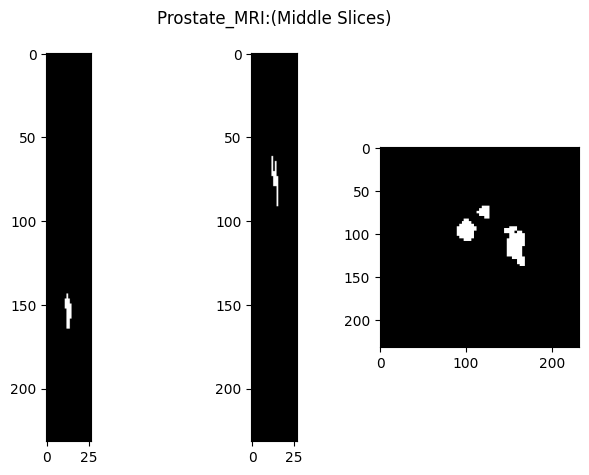

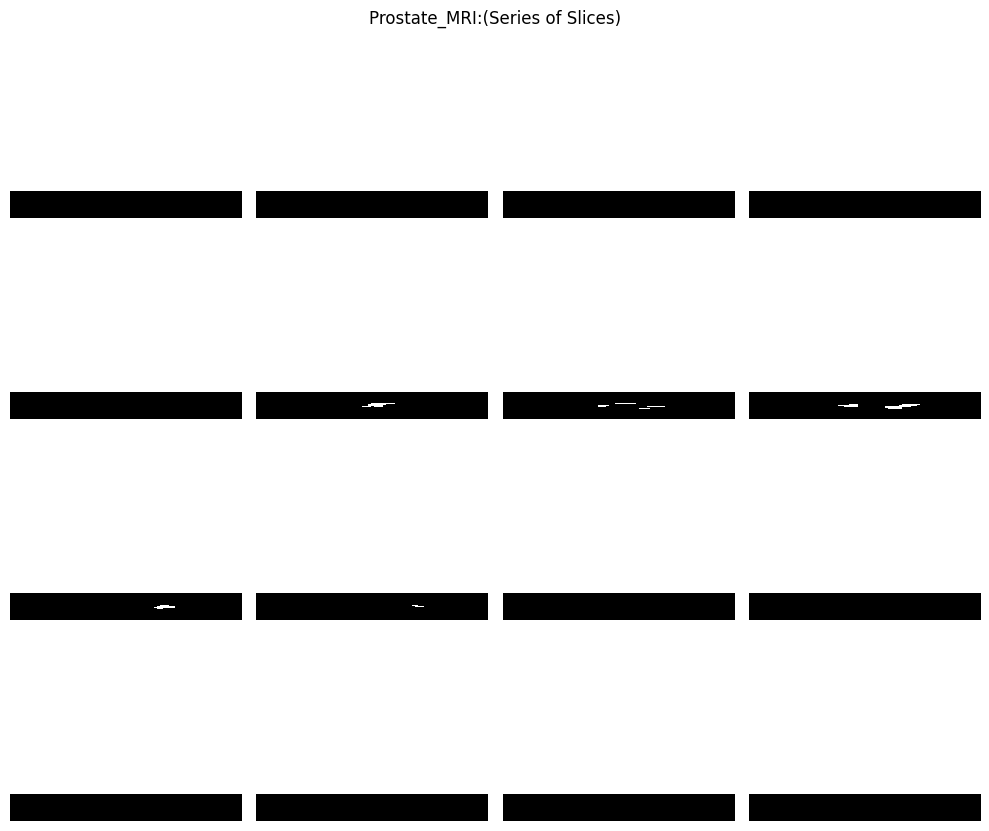

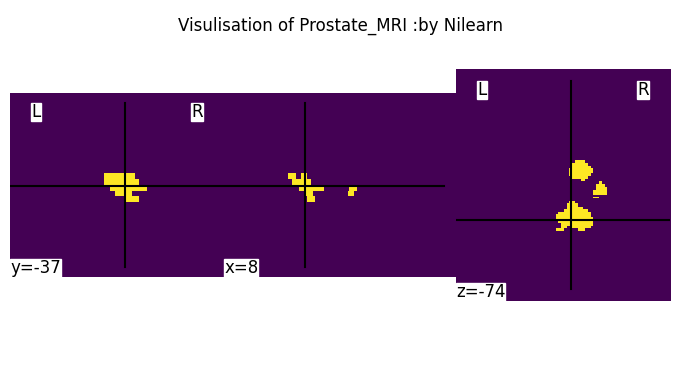

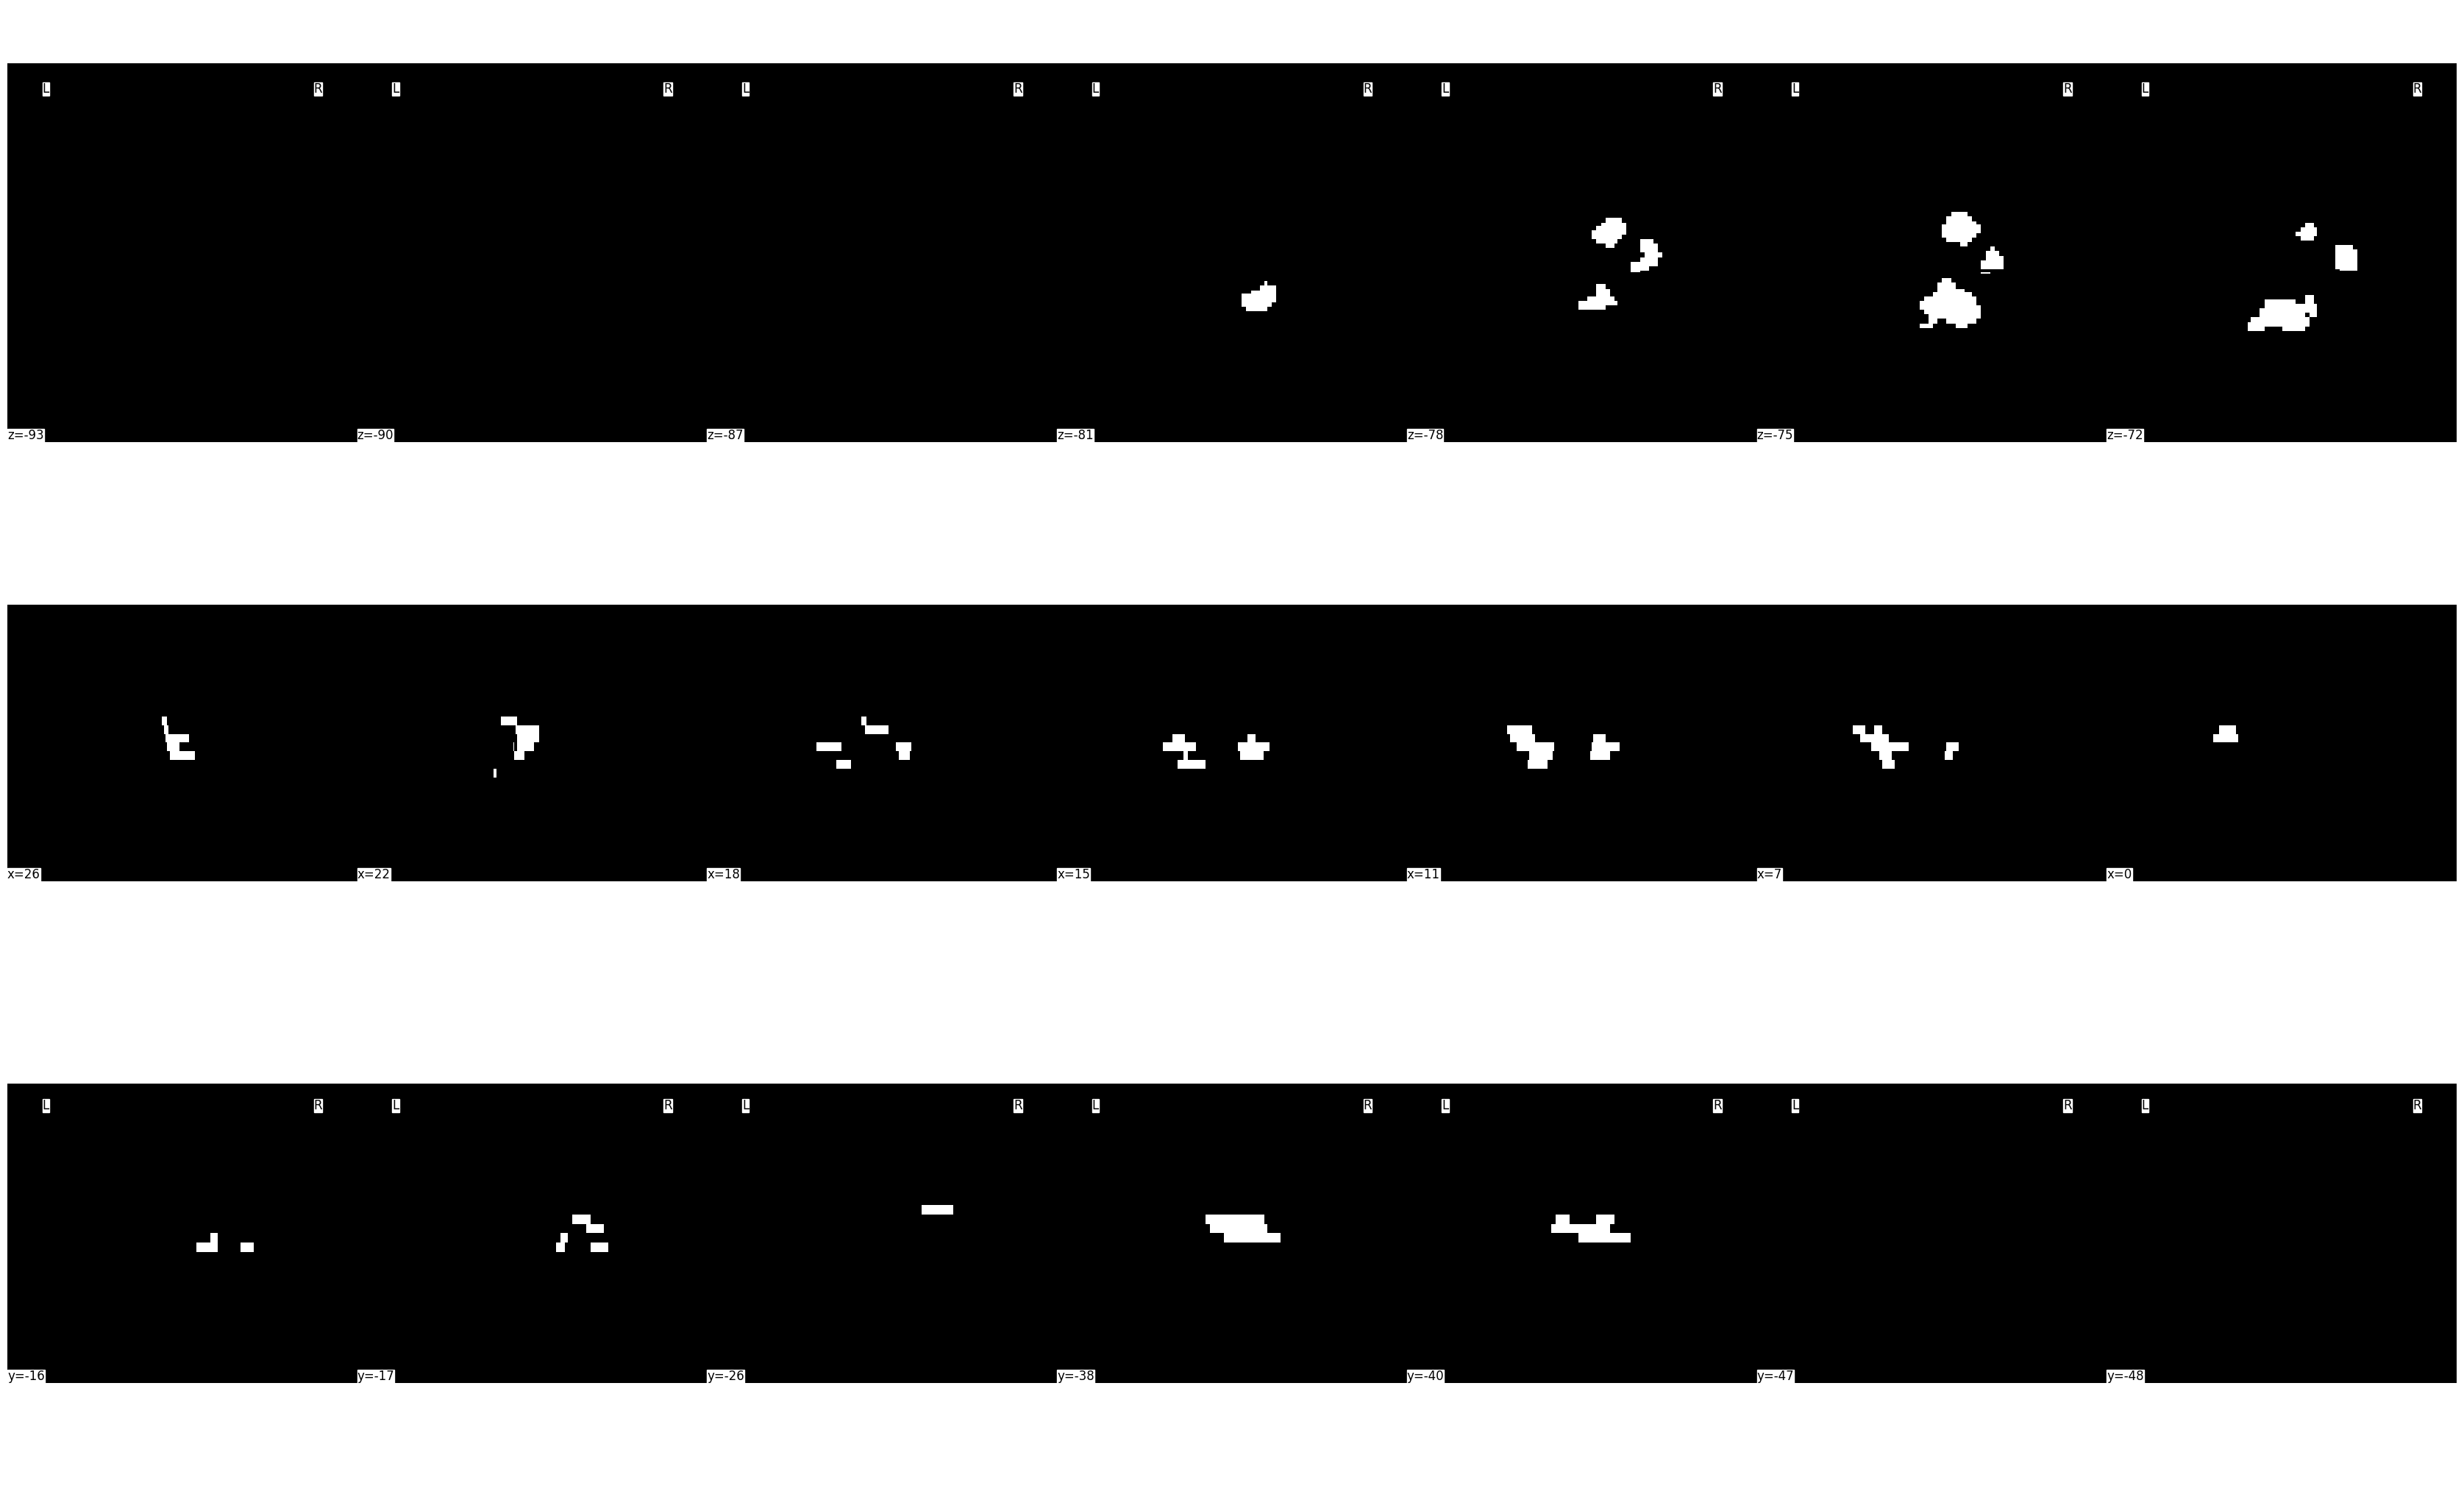

statistical Analysis of visulised image:Prostate MRI
Mean: 0.003199729158409301
Max: 1.0
Min: 0.0
standard deviation: 0.056475577834336044
standard deviation: 0.0031894908917221485


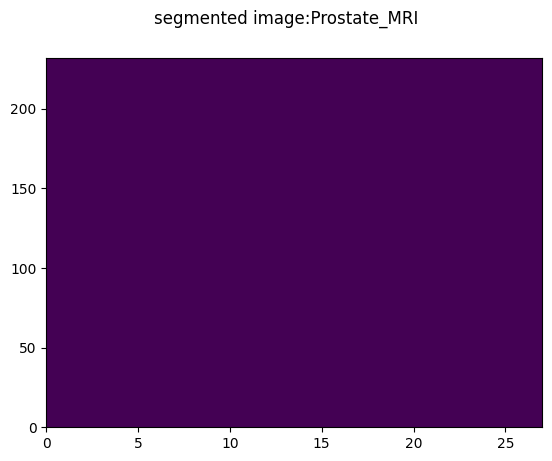

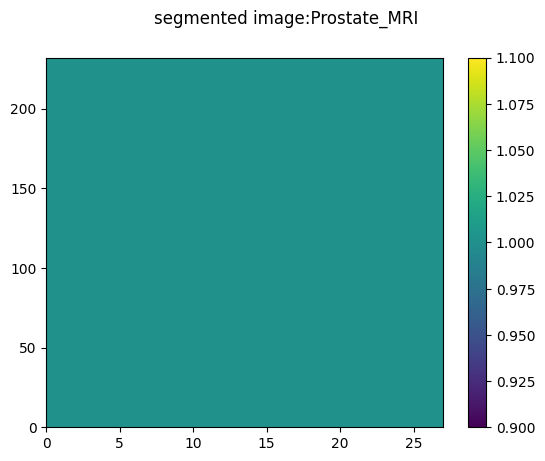

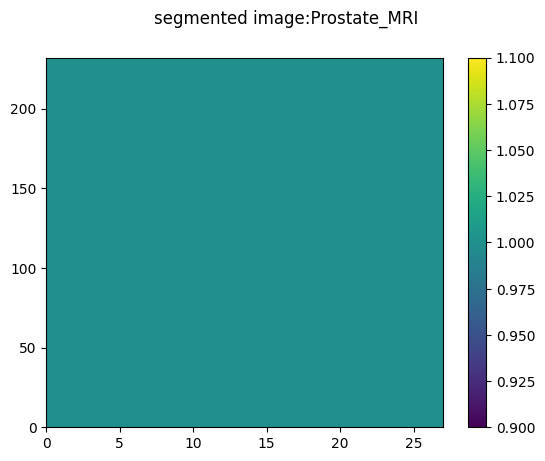

statistical Analysis of segmented image:Prostate MRI
Mean: 0.021711366538952746
Max: 1.0
Min: 0.0
standard deviation: 0.14573943564445413
standard deviation: 0.021239983101963986
Original Array:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0

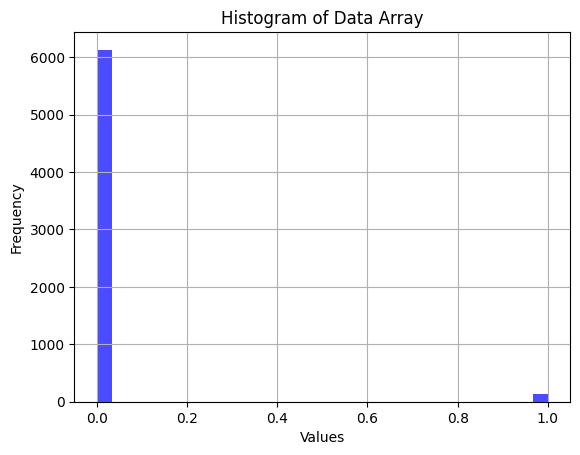

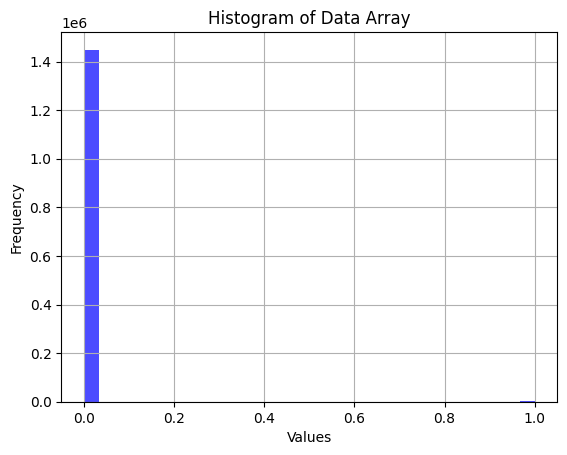

None


In [ ]:
print(prostate_mri157())

In [ ]:
def prostate_mri158():
    img = []
    folder_dir = r"/content/drive/MyDrive/PROSTRATE MRI/New folder2"
    for images in os.listdir(folder_dir):

    # check if the image ends with png
        if (images.endswith(".gz")):
           img.append(images)


    #To read the nifti file by nibabel
    visulised_img=nib.load(os.path.join(folder_dir,img[0]))
    print (visulised_img)



    # view file metadata
    print(visulised_img.header)


    #data is a familiar NumPy array
    visulised_img_data=visulised_img.get_fdata()

    visulishedshape=visulised_img_data.shape

    #visualize a slice
    fig, axs = plt.subplots(1,3)
    fig.suptitle('Prostate_MRI:(Middle Slices)')
    axs[0].imshow(visulised_img_data[visulishedshape[0]//2,:,:], cmap='gray')
    axs[1].imshow(visulised_img_data[:,visulishedshape[1]//2,:], cmap='gray')
    axs[2].imshow(visulised_img_data[:,:,visulishedshape[2]//2], cmap='gray')
    fig.tight_layout()
    plt.show()

#Plot a series of slices
    fig_rows = 4
    fig_cols = 4
    n_subplots = fig_rows * fig_cols
    n_slice = visulised_img_data.shape[0]
    step_size = n_slice // n_subplots
    plot_range = n_subplots * step_size
    start_stop = int((n_slice - plot_range) / 2)

    fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

    for idx, img in enumerate(range(start_stop, plot_range, step_size)):
        axs.flat[idx].imshow(ndi.rotate(visulised_img_data[:, img, :], 90), cmap='gray')
        axs.flat[idx].axis('off')
    fig.suptitle('Prostate_MRI:(Series of Slices)')
    plt.tight_layout()
    plt.show()


    plotting.plot_img(visulised_img)
    plt.suptitle("Visulisation of Prostate_MRI :by Nilearn")
    plt.show()



    plotting.plot_img(visulised_img, display_mode='mosaic', cmap='gray')
    plt.show()


    #statistical anylysis
    print("statistical Analysis of visulised image:Prostate MRI")
    print("Mean:",visulised_img_data.mean())
    print("Max:",visulised_img_data.max())
    print("Min:",visulised_img_data.min())
    print("standard deviation:",ny.std(visulised_img_data))
    print("standard deviation:",ny.var(visulised_img_data))

    #Segmentation of image
    visulised_img_data.shape
    fig, axs = plt.subplots(1,1)
    fig.suptitle('segmented image:Prostate_MRI')
    plt.pcolormesh(visulised_img_data[255])
    plt.colorbar
    plt.show()

    mask=visulised_img_data<320
    plt.suptitle('segmented image:Prostate_MRI')
    plt.pcolormesh(mask[150])
    plt.colorbar()
    plt.show()

    mask_labeled=ny.vectorize(label,signature='(n,m)->(n,m)')(mask)
    fig, axs = plt.subplots(1,1)
    plt.suptitle('segmented image:Prostate_MRI')
    plt.pcolormesh(mask_labeled[150])
    plt.colorbar()
    plt.show()

     #statistical anylysis
    print("statistical Analysis of segmented image:Prostate MRI")
    print("Mean:",visulised_img_data[200].mean())
    print("Max:",visulised_img_data[200].max())
    print("Min:",visulised_img_data[200].min())
    print("standard deviation:",ny.std(visulised_img_data[200]))
    print("standard deviation:",ny.var(visulised_img_data[200]))


     # Original 2D array
    visulised_img_data=visulised_img.get_fdata()
    original_array = visulised_img_data

# Flatten using flatten method
    flattened_array = original_array.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)


    visulised_img1_data=visulised_img.get_fdata()
    original_array2 = visulised_img1_data[200]

# Flatten using flatten method
    flattened_array2 = original_array2.flatten()

# Print the original and flattened arrays
    print("Original Array:")
    print(original_array)
    print("\nFlattened Array:")
    print(flattened_array)

    plt.hist(flattened_array2, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



    plt.hist(flattened_array, bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of Data Array')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()







<class 'nibabel.nifti1.Nifti1Image'>
data shape (442, 442, 25)
affine: 
[[-2.71739006e-01  1.33070605e-12  6.19023642e-16  8.67843704e+01]
 [-1.29968594e-12 -2.65406966e-01  6.43854439e-01  2.61779785e+01]
 [ 2.85648241e-13  5.83200902e-02  2.93009567e+00 -1.20874947e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 442 442  25   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.271739  0.271739  3.0000017 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max  

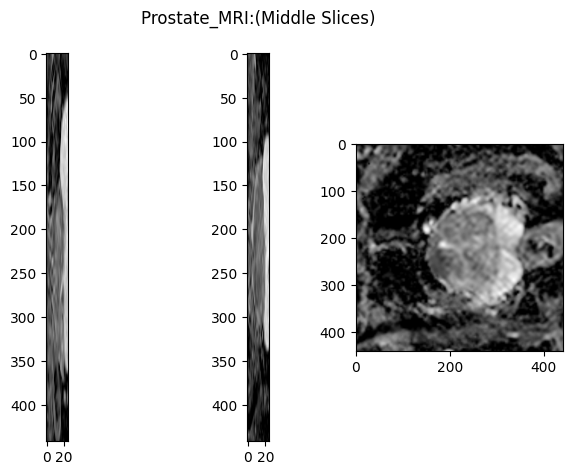

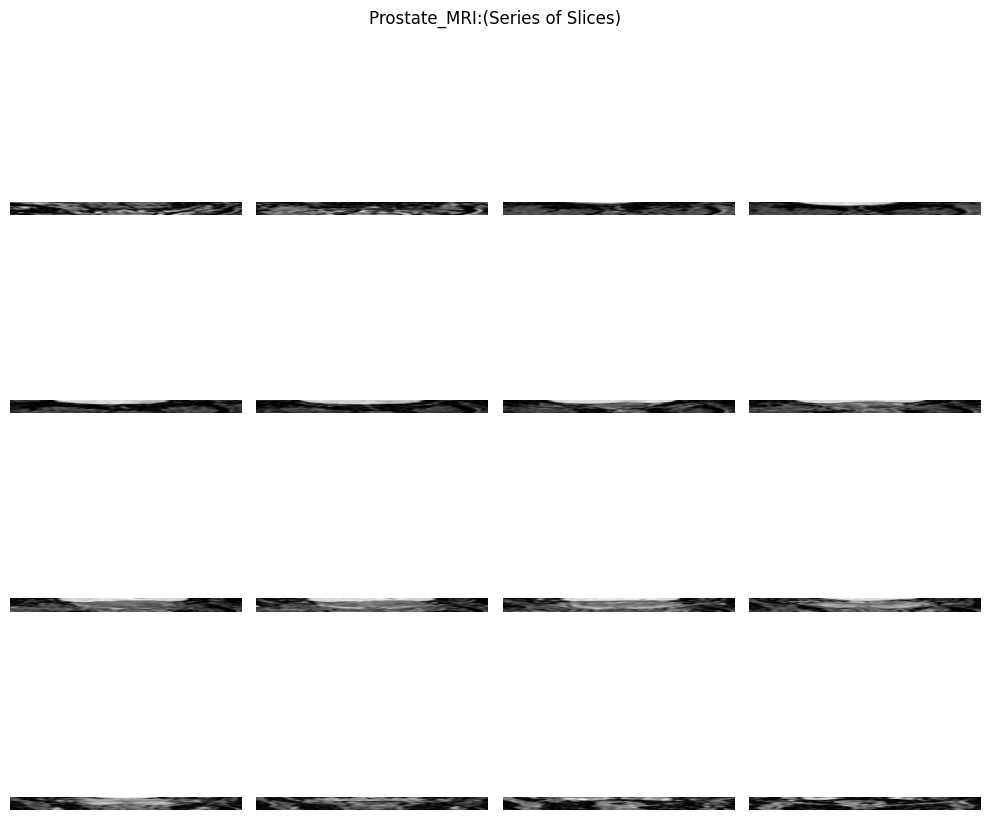

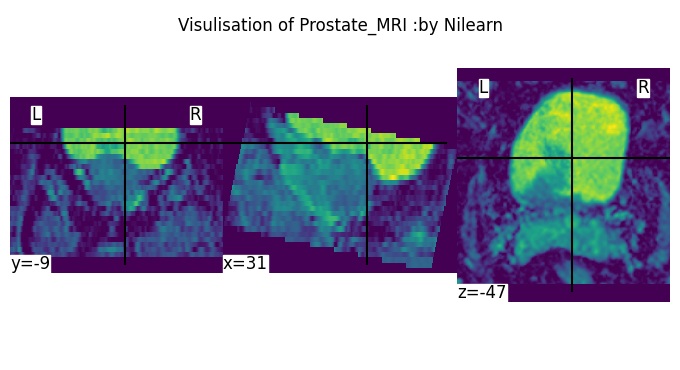

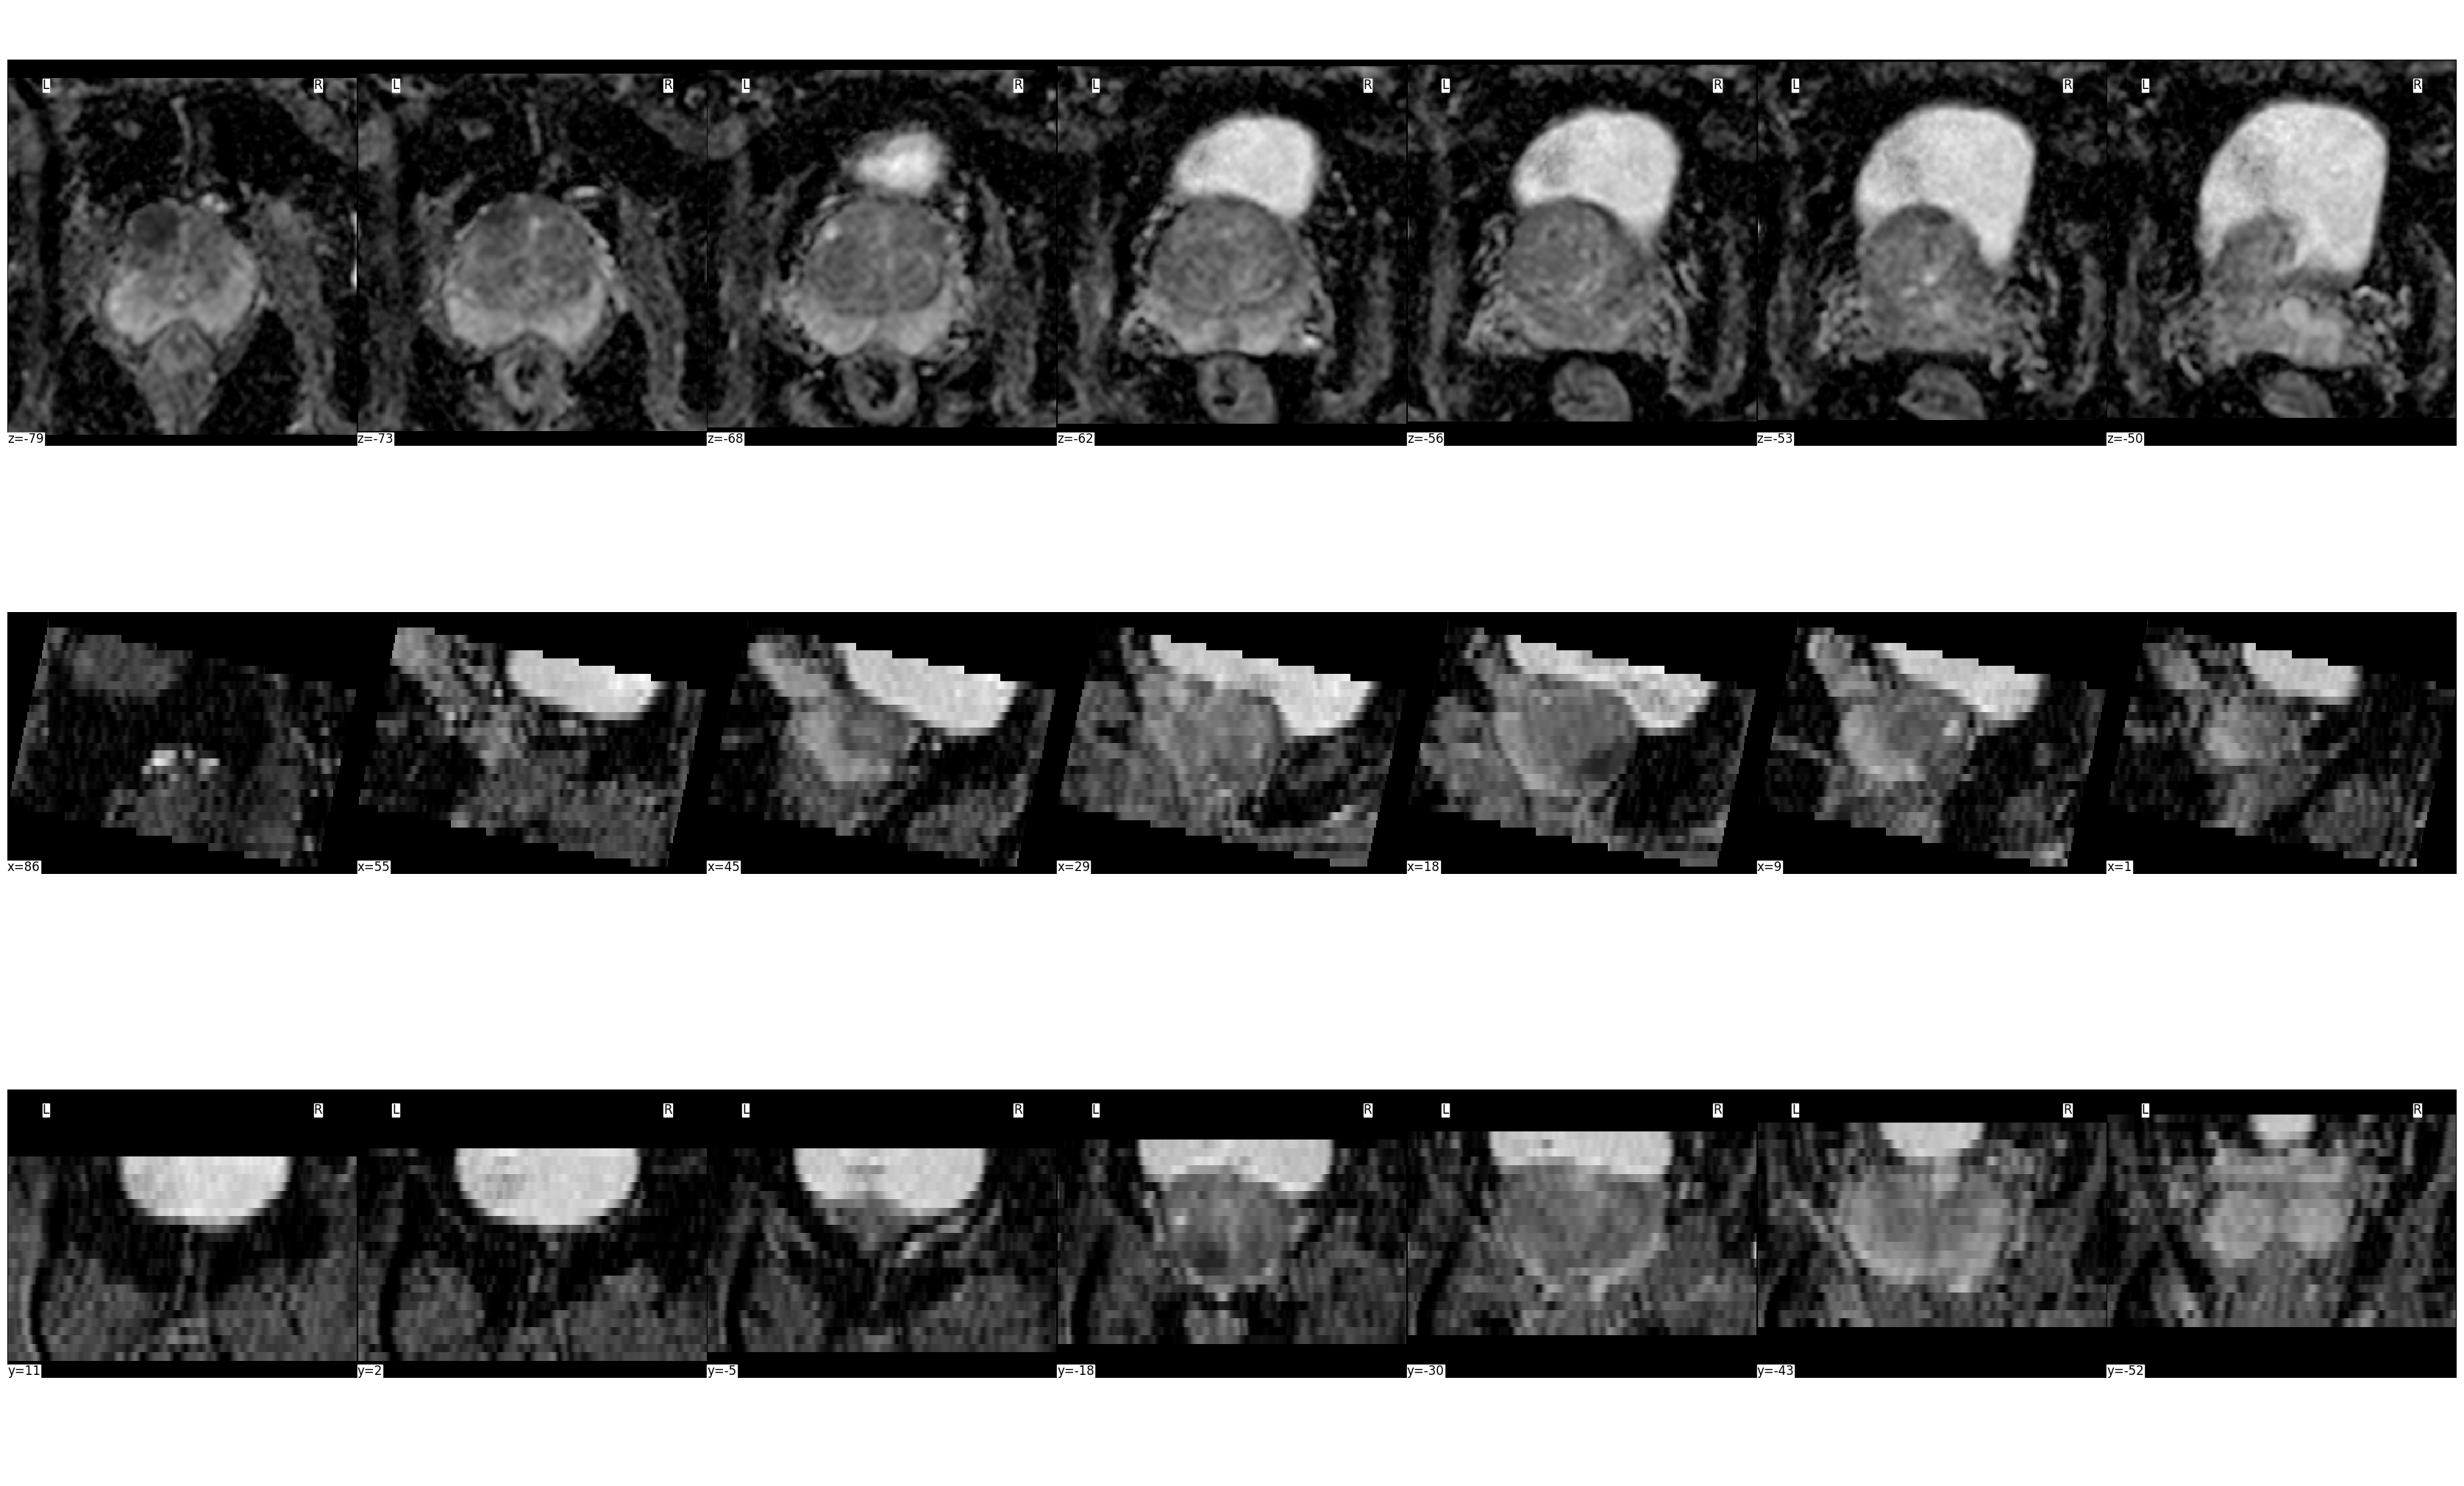

statistical Analysis of visulised image:Prostate MRI
Mean: 817.8060509288981
Max: 3607.068359375
Min: 0.0
standard deviation: 745.8661382826112
standard deviation: 556316.2962366153


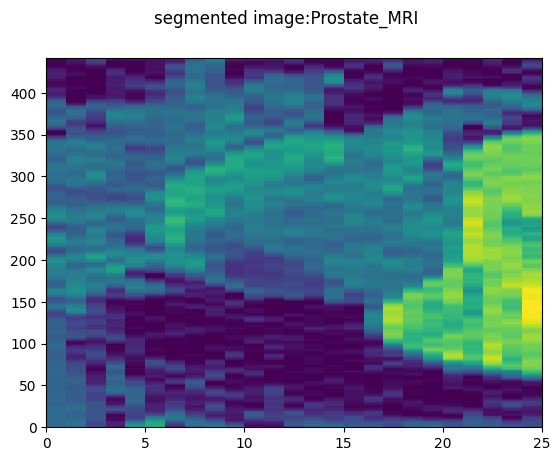

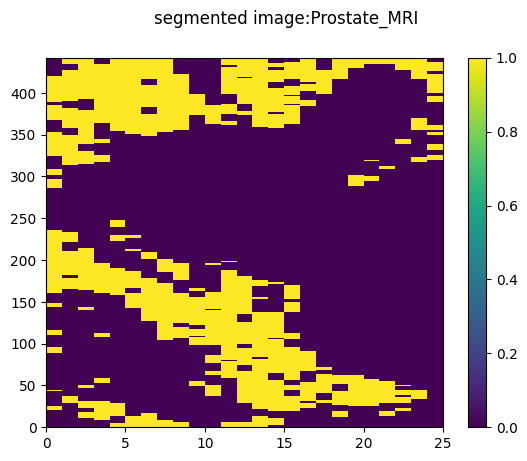

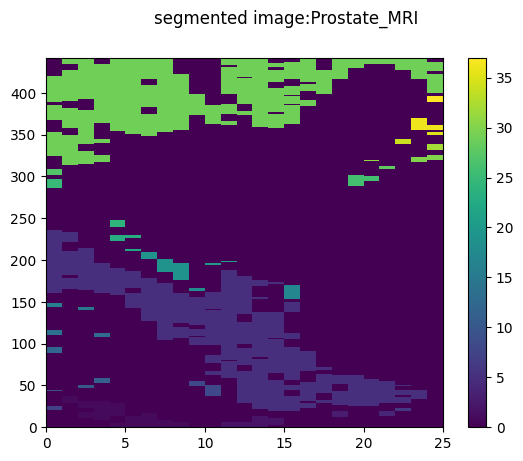

statistical Analysis of segmented image:Prostate MRI
Mean: 1327.3683105965179
Max: 3415.42626953125
Min: 0.0
standard deviation: 863.6383321146188
standard deviation: 745871.1686977207
Original Array:
[[[5.46927734e+02 5.14600037e+02 2.72848411e-12 ... 2.22581665e+02
   6.39209900e+02 6.32138428e+02]
  [5.72061951e+02 5.51761047e+02 3.63797881e-12 ... 3.11707520e+02
   5.95517700e+02 7.32108459e+02]
  [5.90901672e+02 5.75177490e+02 1.81898940e-12 ... 4.03810272e+02
   5.35586670e+02 8.27021667e+02]
  ...
  [0.00000000e+00 1.41775589e+02 8.73596680e+02 ... 9.74474243e+02
   1.14174768e+03 7.36672852e+02]
  [0.00000000e+00 1.94419907e+02 8.73232666e+02 ... 1.02704175e+03
   1.23567529e+03 7.52877075e+02]
  [1.78458176e+01 2.47560852e+02 8.46927307e+02 ... 1.07192737e+03
   1.30530176e+03 7.87992371e+02]]

 [[5.76708679e+02 3.51022003e+02 1.87583282e-12 ... 3.15115112e+02
   6.14414429e+02 6.46918274e+02]
  [6.05969360e+02 3.80505768e+02 2.55795385e-12 ... 4.35045807e+02
   5.63044983e+02

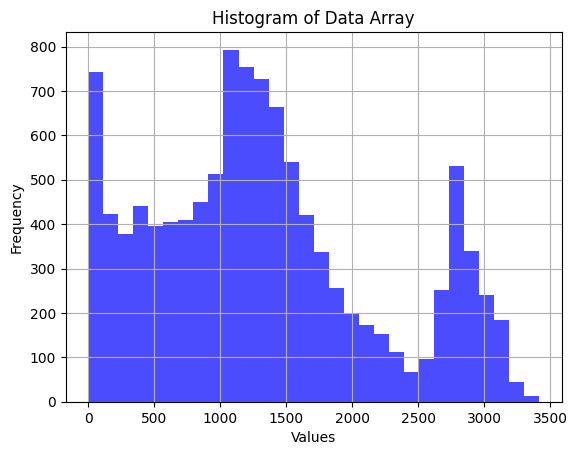

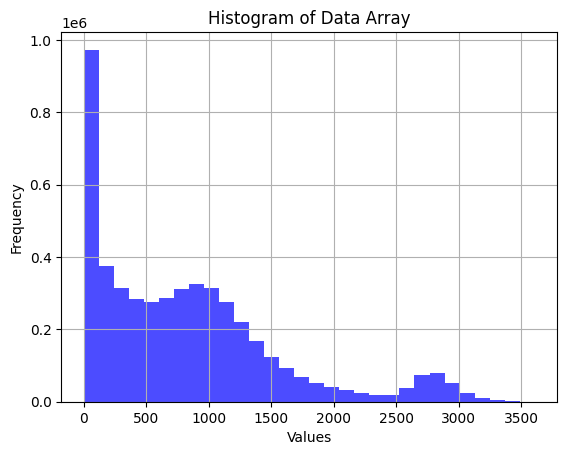

None


In [ ]:
print(prostate_mri158())

In [ ]:
def image_visual_stat_analy(no):
    if(no==1):
        print(abdomen_ct())
    elif(no==2):
        print(heart_mri())
    elif(no==3):
        print(hippocampus_mri())
    elif(no==4):
        print(prostate_mri157())
    elif(no==5):
        print(prostate_mri158())
    else:
        print("file is not availble please ,enter between 1 to 5")


In [ ]:
n=int(input("Enter the no. file which you want to visulise ,statistical anlaysis:\n press:1 for Abdomen_CT \n press 2:for HeartMRI\n press:3 for Hippocampus_MRI\n press:4 for Prostate_MRI157\n press:5 for Prostate_MRI158 \n PRESS:"))
print(image_visual_stat_analy(n))